In [79]:
## overall plan: short and to the point in itemized form
##introduction section
#0 show the node id labels for a single feature each
task0 = "show the node id labels for a single feature each"
#1 show ring network
task1 = "show the ring network "
#2 show ring network for k=[0,...,K] and the adjacency and normalized adjacency matrix as well (3 sets of matrix)
task2 = "show ring/adjacency/S networks and matrices for k=[0,...,N]"
##methodology section
#3 produce a method/tool to monitor/analyze the label changes on the overall network 
#4 show it on a situation with 2D features per node
#5 show how a famous network like Zachary can display a spread of ideologies and monitor
#6 infer the parameters with SGC and then run the simulation on that for same results

#paper points
#we assume that the difference between a markov chain or a 
#control theory perspective is that the markov chain or the 
#recursive function the state of the nodes change. HERE WE ASSUME
#THAT THE NODES STAY THE SAME WITH THEIR NATURAL FIXED PREDISPOSITIONS
#AND THAT THEIR ENVIRONMENT SHIFTS THEIR PERSPECTIVE. 
#so we start with a single features and see how the environment changes
#them according to different degrees of interaction.
#and that the dynamics of the interactions are constant as well.
#we consider 'k' to be equivalent to a social process 'epoch'
#time index which registers new time points of social exchange 
#without underlying user change.

"show ring/adjacency/S networks and matrices for k=[0,...,N]"

In [201]:
using LinearAlgebra, Plots, LightGraphs, DelimitedFiles, Random, StatsPlots, GraphPlot, Colors, Cairo, Compose
using Statistics

In [81]:
##introduction

In [82]:
NN1 = 20;

blueNodes = [5,10,11,12,14,15];

varX = [];

K_MAX = 25

#all the adjacency matrices at different powers
Adj_Dict = []
#all the normed adjacency matrices at different powers
Adj_Normed_Dict = []

0-element Array{Any,1}

In [83]:
print(varX)

Any[]

In [84]:
function makeSingleFeatureVect()
    global varX
    varX = rand(NN1,1)
    [varX[i] = -1 * rand() for i in blueNodes]
end
makeSingleFeatureVect();

In [191]:
function displaySingleFeature()    
    global varX
    varXwide = repeat(varX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Node Features",
            yaxis=:flip,aspect_ratio=1.0,
            framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
            yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
            c=cgrad([:blue,:red]))
    return hVarX
end

function displayProjectedFeature(projectionX,powerInd)   
    varXwide = repeat(projectionX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Regression k=$(powerInd)",
                yaxis=:flip,aspect_ratio=1.0,
                framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.9),
                yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(.5,5),bordercolor="white",xaxis=false,
                c=cgrad([:blue,:red]))
    return hVarX
end
#adding the thresholds for the colors
function displaySingleFeatureThres()    
    global varX
    varXwide = repeat(varX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Node Features",
            yaxis=:flip,aspect_ratio=1.0,
            framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
            yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
            fill=cgrad([:blue,:red]),clims=(-1,1))
    return hVarX
end

function displayProjectedFeatureThres(projectionX,powerInd)   
    varXwide = repeat(projectionX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Regression k=$(powerInd) \n (thresholded)",
                yaxis=:flip,aspect_ratio=1.0,
                framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.9),
                yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(.5,5),bordercolor="white",xaxis=false,
                fill=cgrad([:blue,:red]),clims=(-1,1))
    return hVarX
end

displayProjectedFeatureThres (generic function with 1 method)

In [188]:
function vizMatrix(Adj,powerInd)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Adjacency Matrix, k=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function vizMatrixNormed(Adj)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Normalized Adjacency",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]))
    return hAdjNN1
end
function vizMatrixNormed(Adj,powerInd)#multiple dispatch
    global NN1
    hAdjNN1 = heatmap(Adj,title="Normalized Adjacency, k=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]))
    return hAdjNN1
end
#so that the values of the color map are constrained between these values
function vizMatrixThresh(Adj,powerInd)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Adjacency Matrix, k=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]),clims=(0,1))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function vizMatrixNormedThresh(Adj,powerInd)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Normalized Adjacency, k=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]),clims=(0,1))
    return hAdjNN1
end

vizMatrixNormedThresh (generic function with 2 methods)

In [87]:
function makeRingAdjacency()
    global NN1
    #make the adjacency for the ring network
    AdjNN1 = zeros(NN1,NN1)
    for ii in 1:size(AdjNN1)[1]
        for jj in 1:size(AdjNN1)[2]            
            if(ii == (jj+1))
                AdjNN1[ii,jj] = 1
            elseif(ii == (jj-1))
                AdjNN1[ii,jj] = 1
            end        
        end
    end
    AdjNN1[1,NN1] = 1
    AdjNN1[NN1,1] = 1    
    return AdjNN1
end

makeRingAdjacency (generic function with 1 method)

In [88]:
function adjacency2Smatrix(AdjMat)
    Adj = deepcopy(AdjMat)
    #make the diagonal for the adj matrix
    diag1 = zeros(size(Adj)[1],size(Adj)[2])
    [diag1[i,i]=1 for i in 1:size(diag1)[1]] 
    #add self-loops as the paper describes
    Adj .+= diag1
    #get degree matrix
    degrees = sum(Adj,dims=2)
    diag2 = zeros(size(Adj)[1],size(Adj)[2])
    [diag2[i,i]=degrees[i] for i in 1:size(diag1)[1]] 
    #make the diagonal matrix to the power of -1/2
    diag2 = diag2^(-1/2)
    #make the normalized S matrix
    S = diag2 * Adj * diag2
    return S
end    
    

adjacency2Smatrix (generic function with 1 method)

In [89]:
#define associated vector of attributes for each node that can be eg [burger, pizza]
#define the identity of each node as training data
function redStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == 1.0)
        return "#FF5555"
    elseif(rpol == 0.9)
        return "#FE5555"
    elseif(rpol == 0.8)
        return "#EE6666"    
     elseif(rpol == 0.7)
        return "#ED6666"
     elseif(rpol == 0.6)
        return "#DD7777" 
    elseif(rpol == 0.5)
        return "#DC7777"
        elseif(rpol == 0.4)
        return "#CC8888"
        elseif(rpol == 0.3)
        return "#CB8888"
        elseif(rpol == 0.2)
        return "#BB9999"
        elseif(rpol == 0.1)
        return "#BA9999"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end

function blueStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == -1.0)
        return "#5555FF"
    elseif(rpol == -0.9)
        return "#5555FE"
    elseif(rpol == -0.8)
        return "#6666EE"    
     elseif(rpol == -0.7)
        return "#6666ED"
     elseif(rpol == -0.6)
        return "#7777DD" 
    elseif(rpol == -0.5)
        return "#7777DC"
        elseif(rpol == -0.4)
        return "#8888CC"
        elseif(rpol == -0.3)
        return "#8888CB"
        elseif(rpol == -0.2)
        return "#9999BB"
        elseif(rpol == -0.1)
        return "#9999BA"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end


blueStr (generic function with 1 method)

In [90]:
function singleVarGraphVizImageMake(Adj,imageName)
    global varX
    strNN1=""
    #init
    strNN1 *= "strict digraph graphname { concentrate=true node [shape=circle, style=filled, fontsize=14] "
    #node insertions
    for ii in 1:size(Adj)[1]
        if(varX[ii] >= 0)
            tmpStr = redStr(varX[ii])        
            strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
            strNN1 *= " N$(ii) }"   
        else
            tmpStr = blueStr(varX[ii]) 
            strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
            strNN1 *= " N$(ii) }"   
        end
    end
    #edges insertion
    for ii in 1:size(Adj)[1]
        for jj in 1:size(Adj)[2]
            if(Adj[ii,jj] > 0)
                if(ii != jj)
                    strNN1 *= " N$(ii) -> N$(jj) [dir=both penwidth=$(Adj[ii,jj])];" #str *= " c -- d3 -- A2 -- a; "
                end
                if(ii == jj)
                    strNN1 *= " N$(ii) -> N$(jj) [penwidth=$(Adj[ii,jj])];" #str *= " c -- d3 -- A2 -- a; "
                end
            end
        end
    end
    #tie off
    strNN1 *= "}";
    fileNameNN1 = "$(imageName).dot"
    filePNGNN1 = "$(imageName).png"
    writedlm( string("./figures/",fileNameNN1), [strNN1] ,quotes=false)
    loc = pwd()
    run(`neato ./figures/$fileNameNN1 -Tpng -o ./figures/$filePNGNN1`)
    
end


singleVarGraphVizImageMake (generic function with 1 method)

In [91]:
#task0
println(task0)

show the node id labels for a single feature each


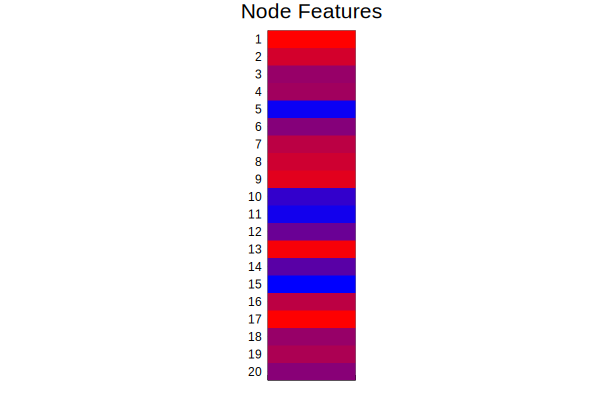

this feature set is fixed as personal inner voice


In [150]:
hVarX = displaySingleFeature()
p=plot(hVarX,layout=1)
display(p)
savefig(p,"figures/nodeSingleFeatures.png")
println("this feature set is fixed as personal inner voice")

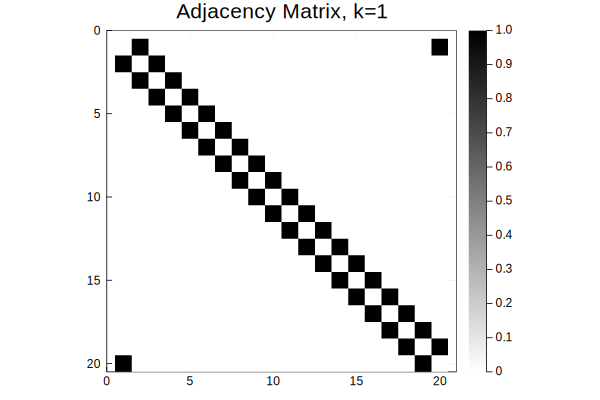

ring adj matrix


In [93]:
adjMatrix = makeRingAdjacency()
hVarX = vizMatrix(adjMatrix,1)
p1=plot(hVarX,layout=1)
display(p1)
savefig(p1,"figures/adjmatrix.png")
println("ring adj matrix")

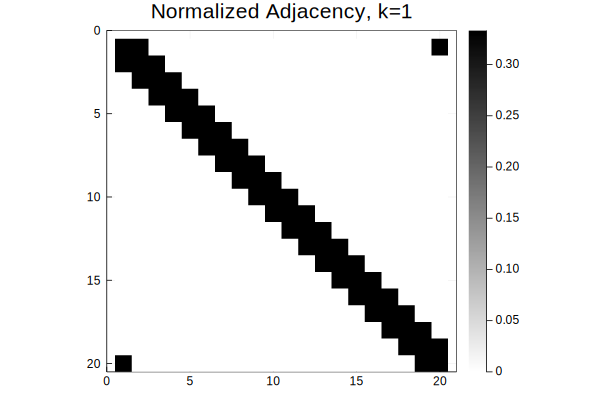

ring adj norm matrix


In [94]:
adjMatrixNorm = adjacency2Smatrix(deepcopy(adjMatrix))
hVarX2 = vizMatrixNormed(adjMatrixNorm,1)
p2=plot(hVarX2,layout=1)
display(p2)
savefig(p2,"figures/adjmatrixNorm.png")
println("ring adj norm matrix")
adjMatrixNorm;

In [95]:
#task1
println(task1)

show the ring network 


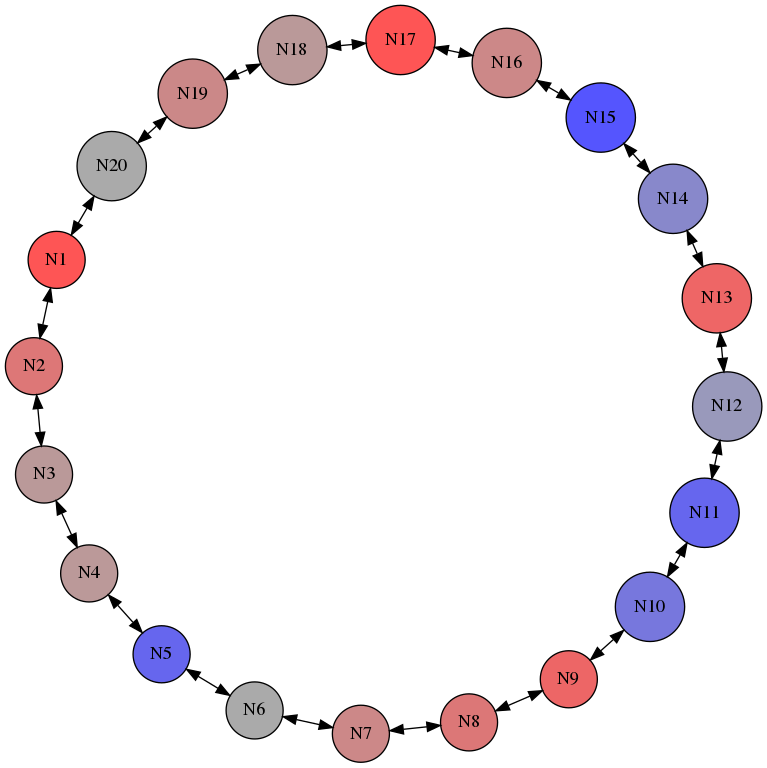

Fontconfig warning: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 5: unknown element "its:rules"
Fontconfig warning: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 6: unknown element "its:translateRule"
Fontconfig error: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 6: invalid attribute 'translate'
Fontconfig error: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 6: invalid attribute 'selector'
Fontconfig error: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 7: invalid attribute 'xmlns:its'
Fontconfig error: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 7: invalid attribute 'version'
Fontconfig warning: "/home/alex/.julia/artifacts/82f1062ef3

In [96]:
singleVarGraphVizImageMake(adjMatrix,"try")
display("image/png", read("./figures/try.png"))

Fontconfig warning: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 5: unknown element "its:rules"
Fontconfig warning: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 6: unknown element "its:translateRule"
Fontconfig error: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 6: invalid attribute 'translate'
Fontconfig error: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 6: invalid attribute 'selector'
Fontconfig error: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 7: invalid attribute 'xmlns:its'
Fontconfig error: "/home/alex/.julia/artifacts/82f1062ef35feaa6d4cc426c15574338f12f5fd1/lib/../etc/fonts/fonts.conf", line 7: invalid attribute 'version'
Fontconfig warning: "/home/alex/.julia/artifacts/82f1062ef3

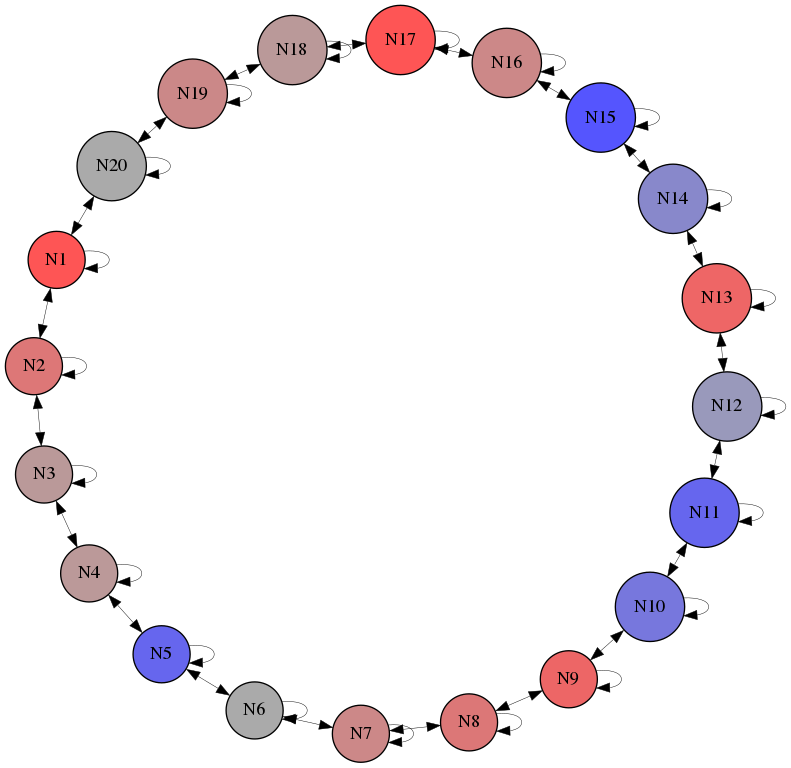

In [97]:
singleVarGraphVizImageMake(adjMatrixNorm,"try2")
display("image/png", read("./figures/try2.png"))

In [98]:
#task 2
println(task2)

show ring/adjacency/S networks and matrices for k=[0,...,N]


In [99]:
adjMatrixK1 = makeRingAdjacency()
Adj_Dict = Dict()
for i in 0:K_MAX   
    Adj_Dict[i] = adjMatrixK1^i
end


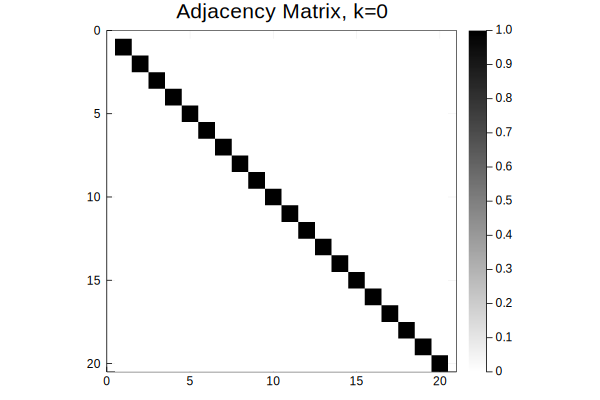

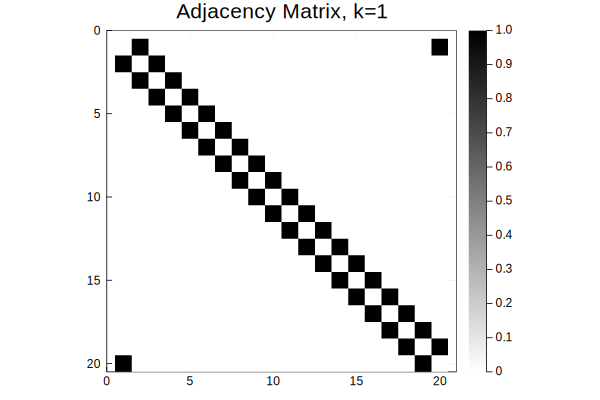

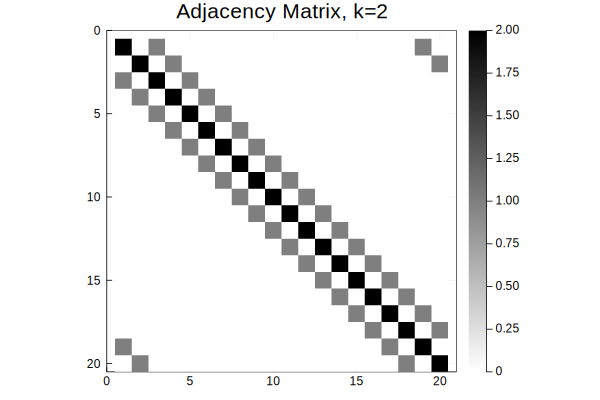

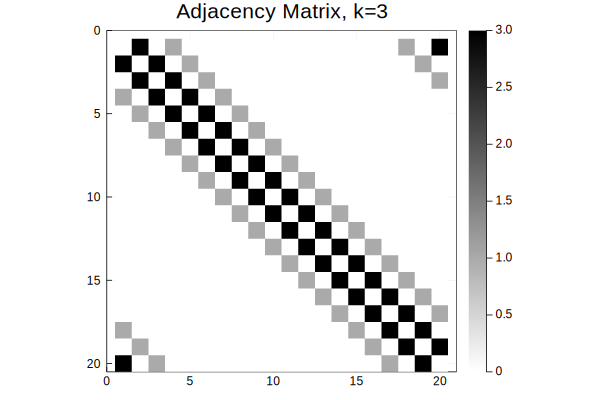

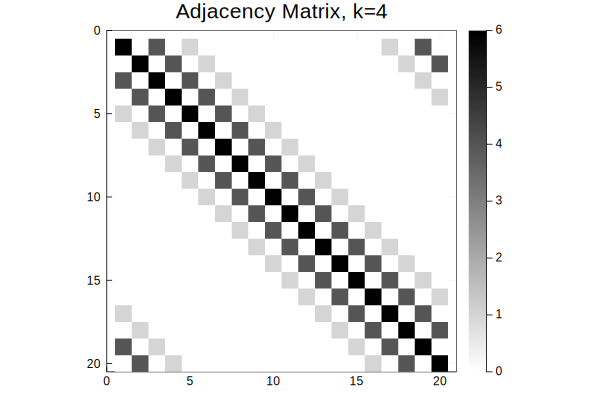

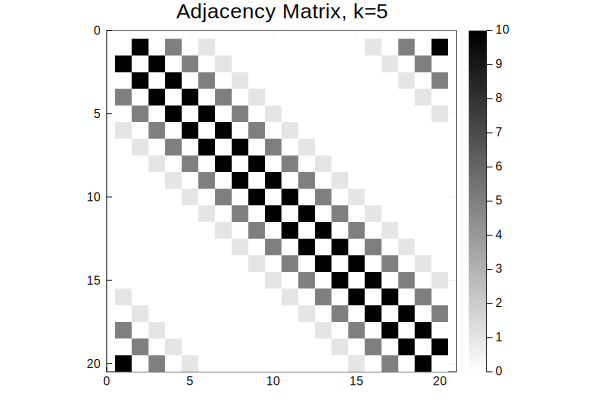

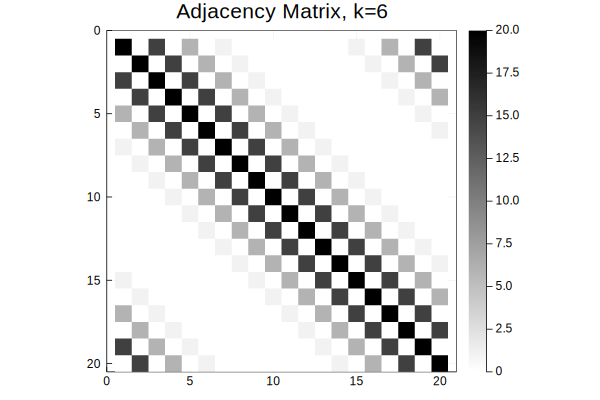

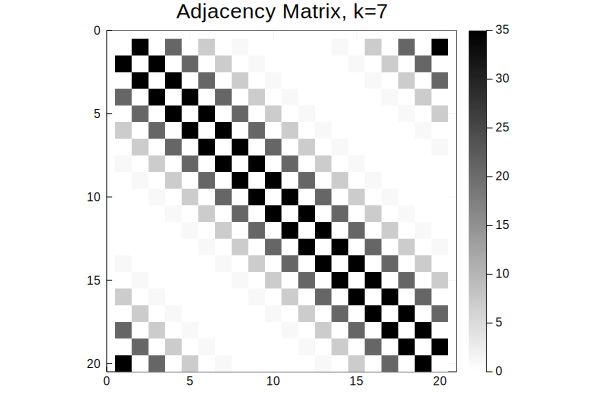

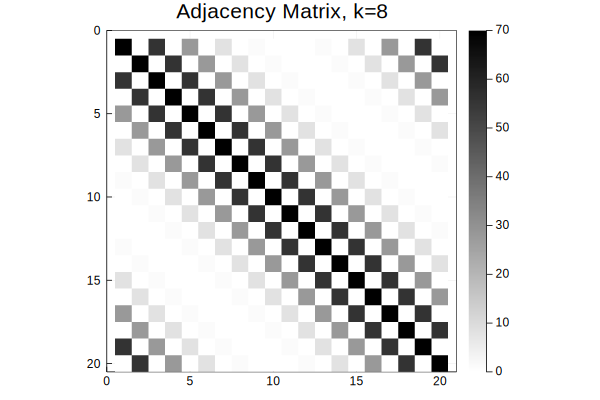

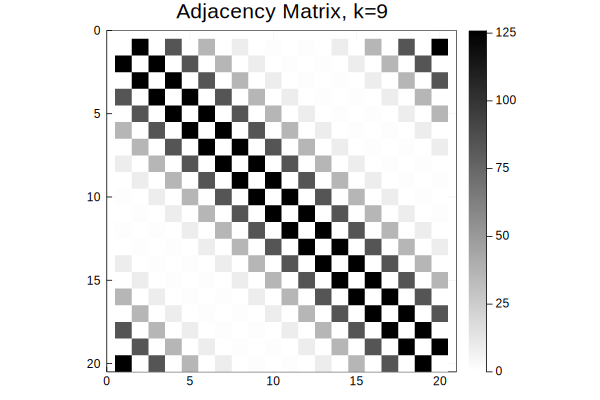

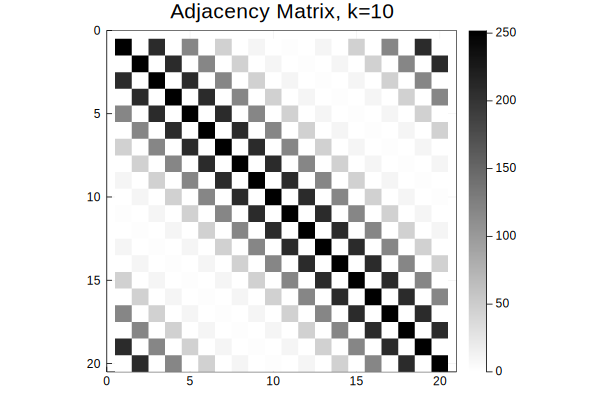

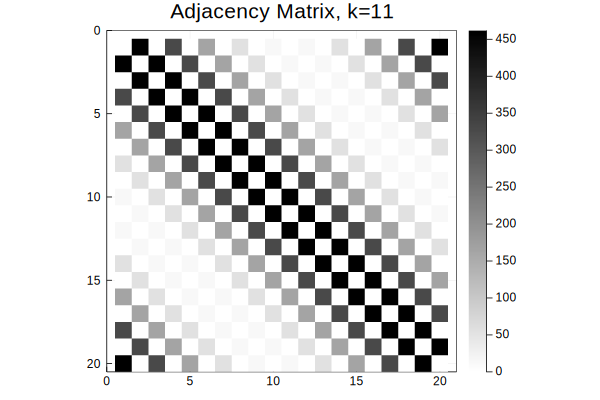

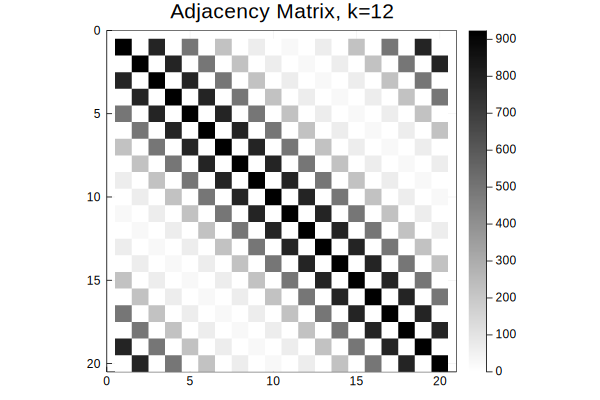

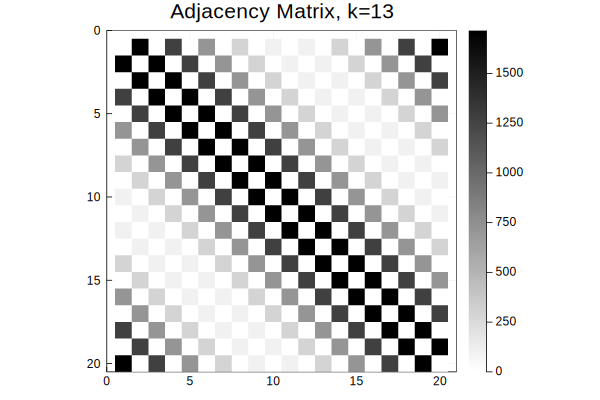

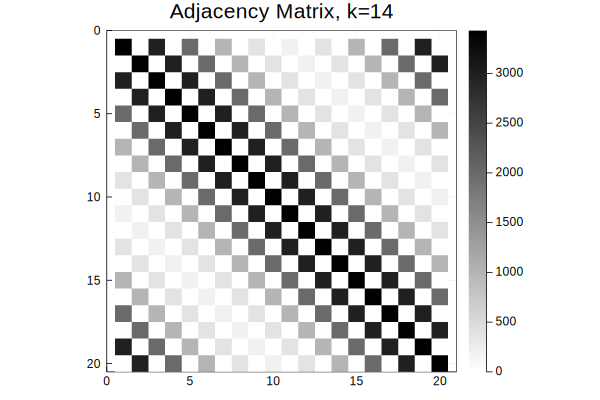

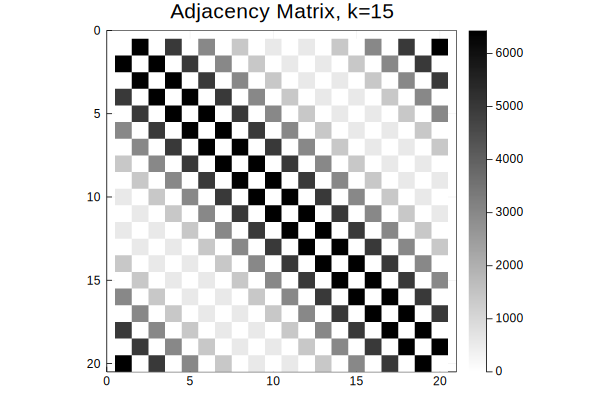

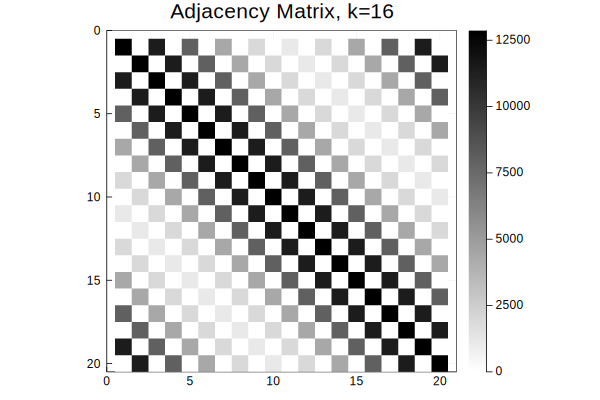

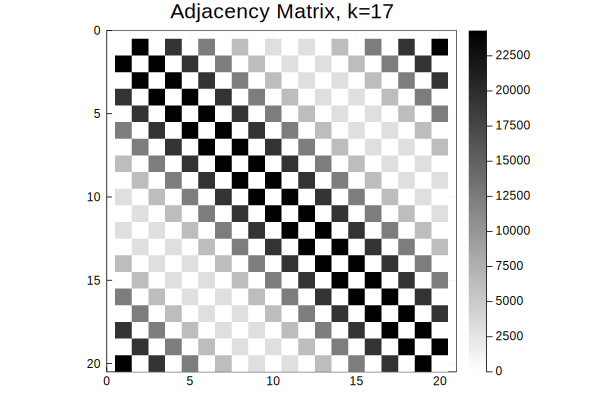

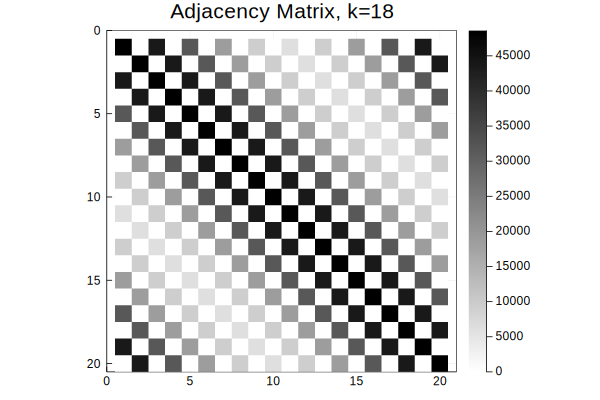

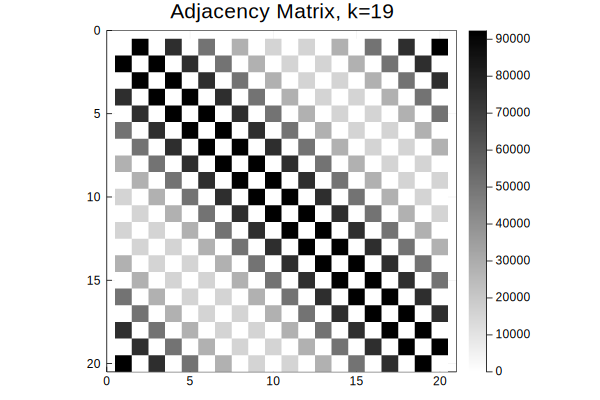

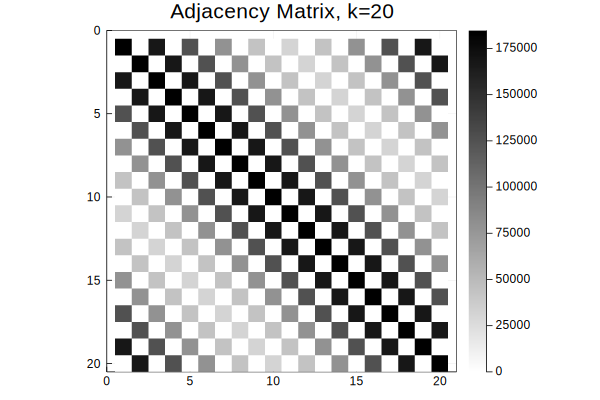

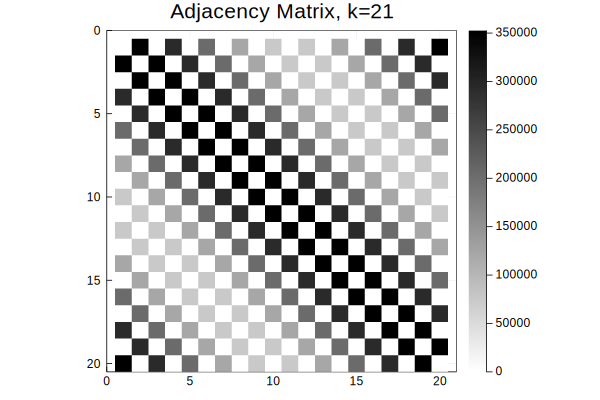

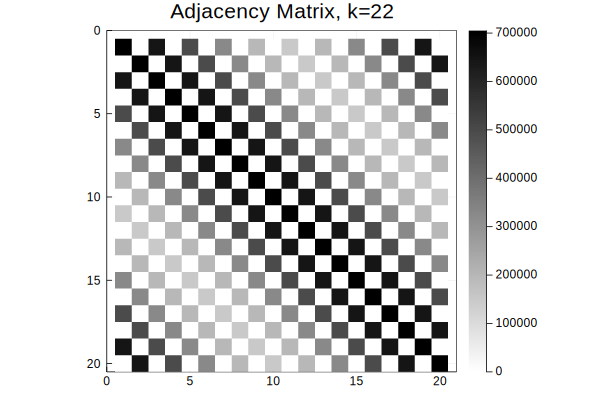

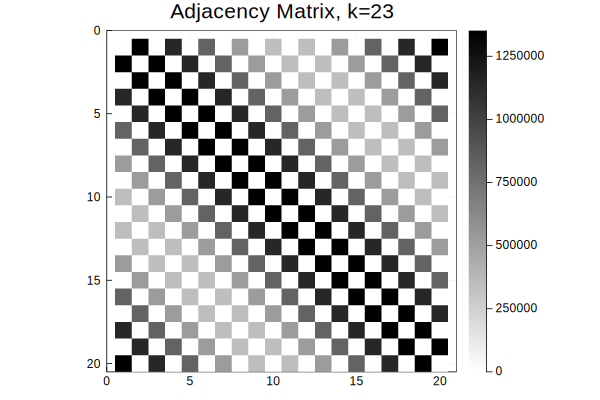

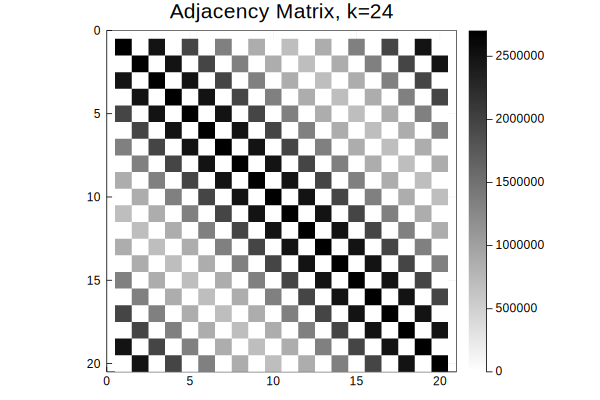

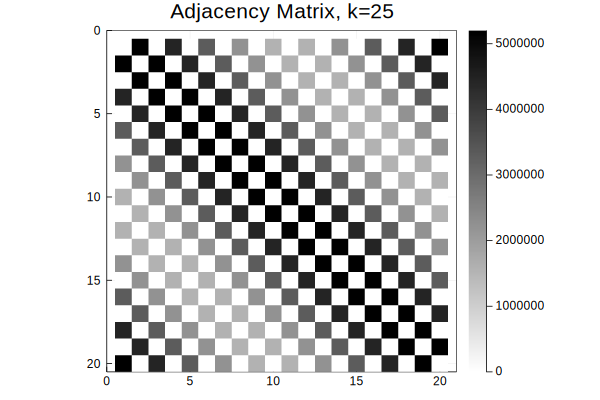

In [100]:
for i in 0:K_MAX   
    hVarX = vizMatrix(Adj_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"./figures/adjmatrixPow$(i).png")    
end


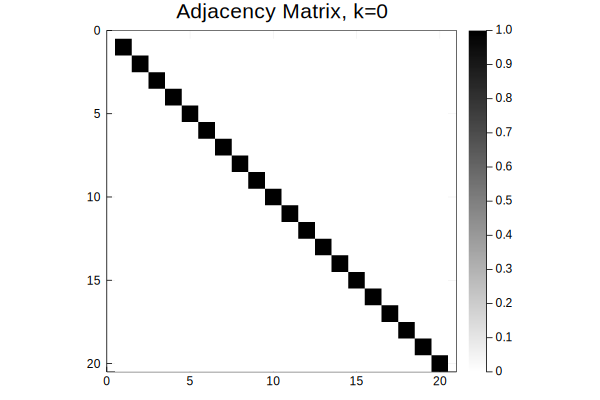

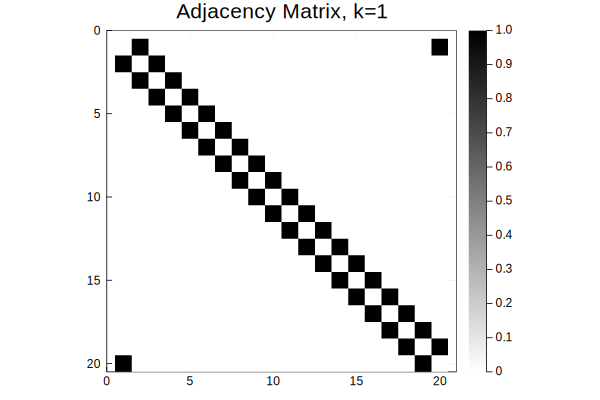

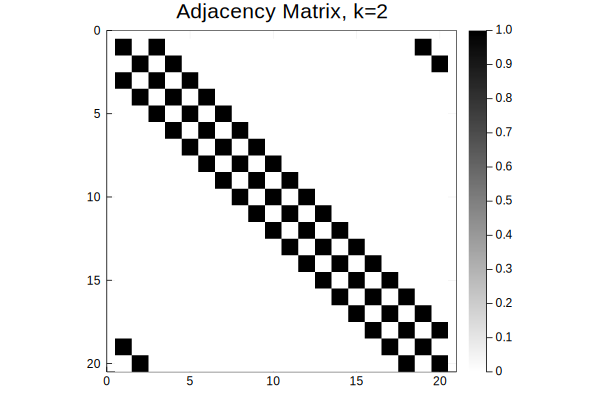

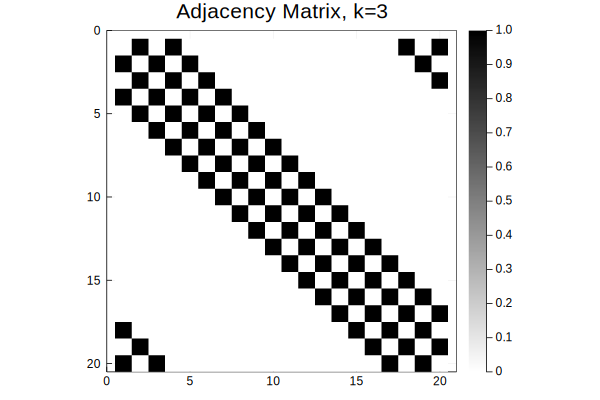

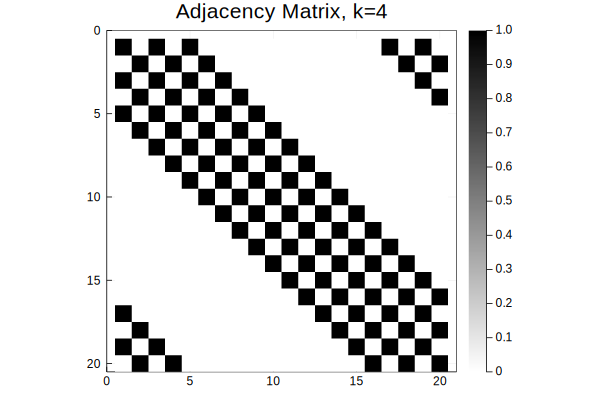

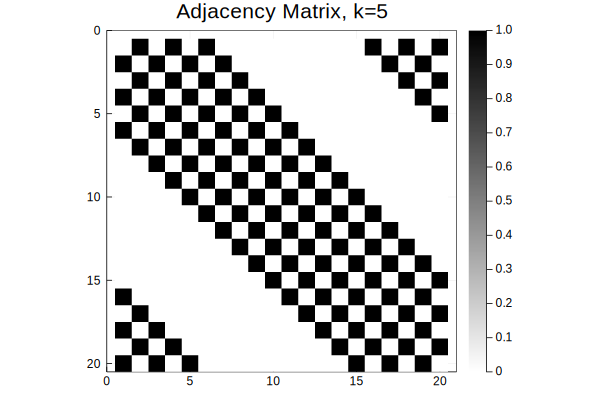

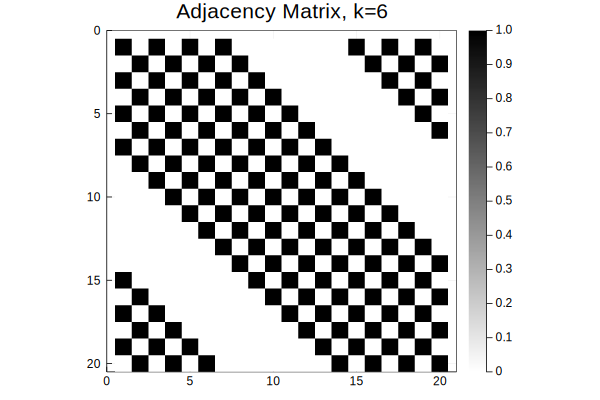

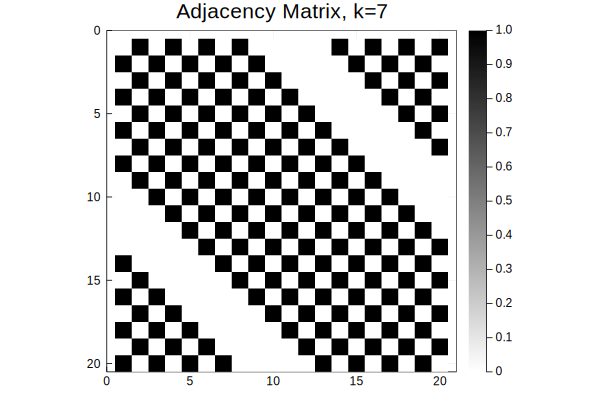

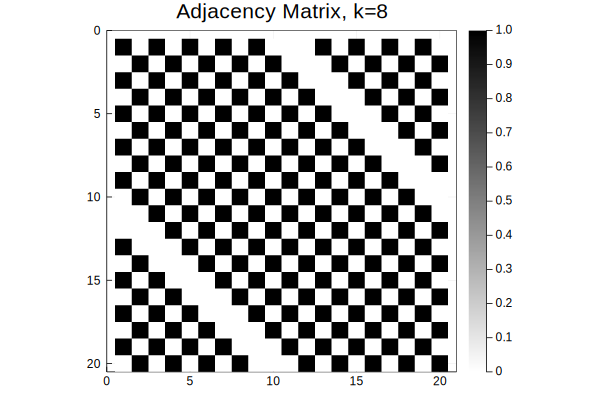

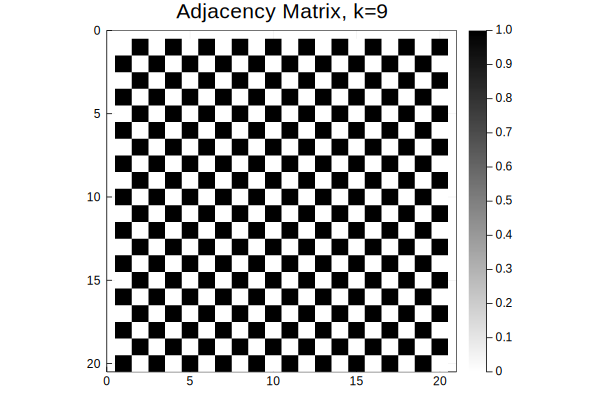

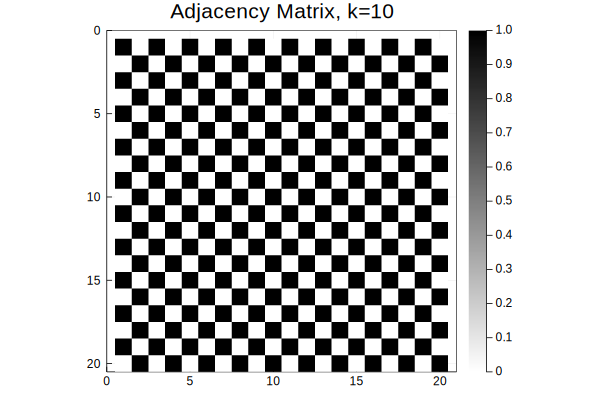

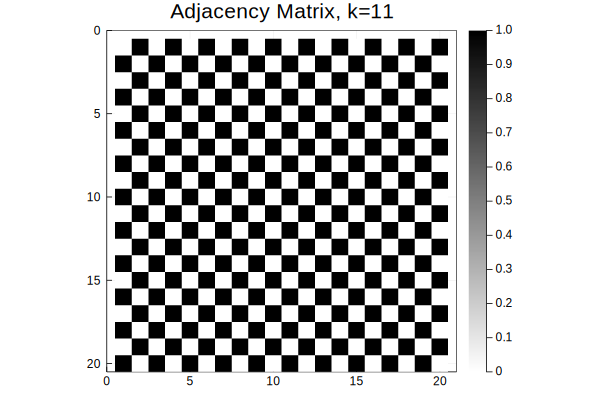

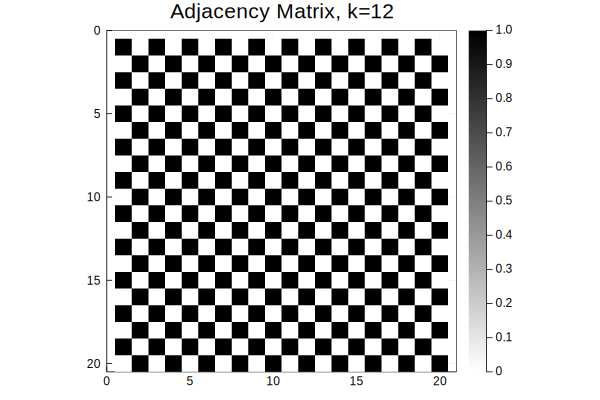

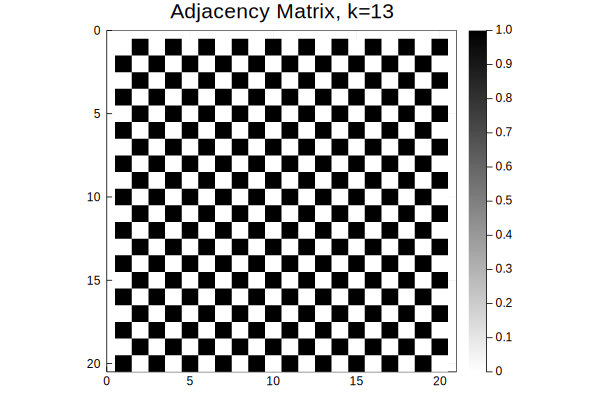

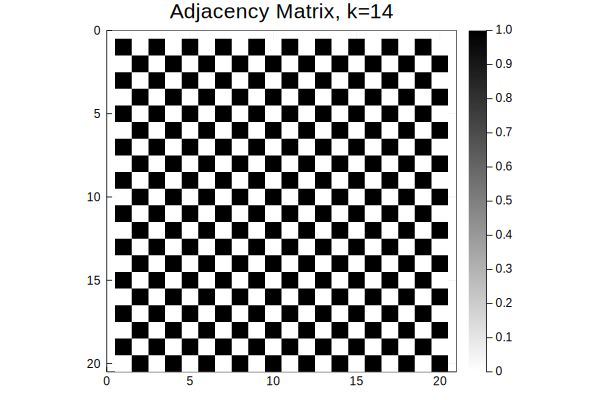

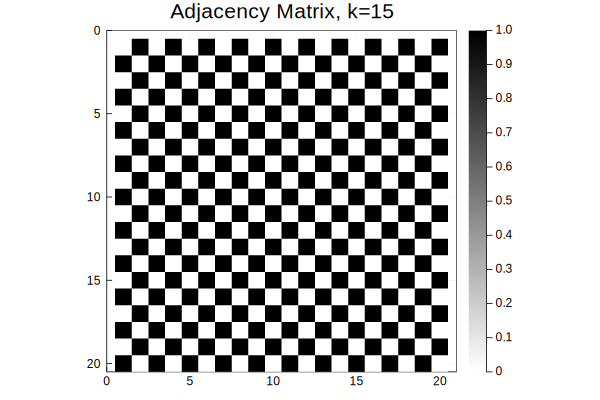

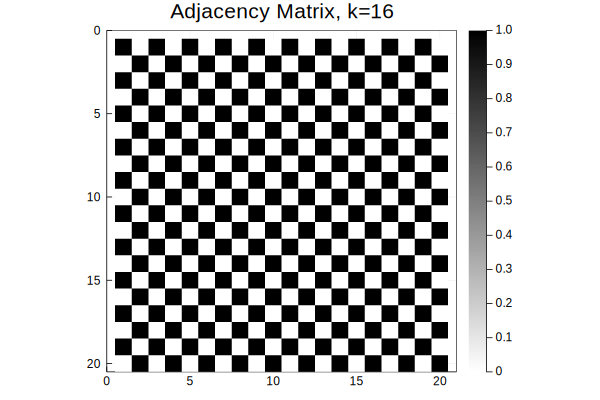

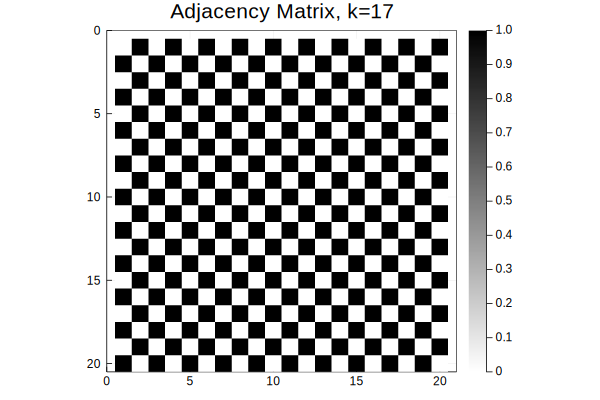

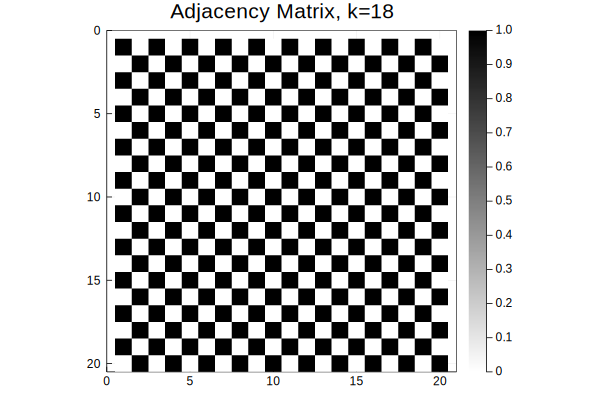

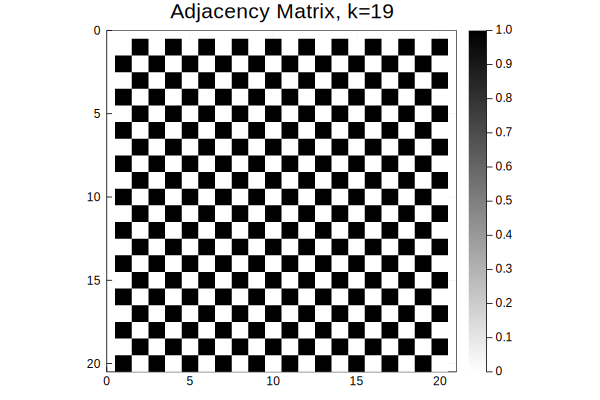

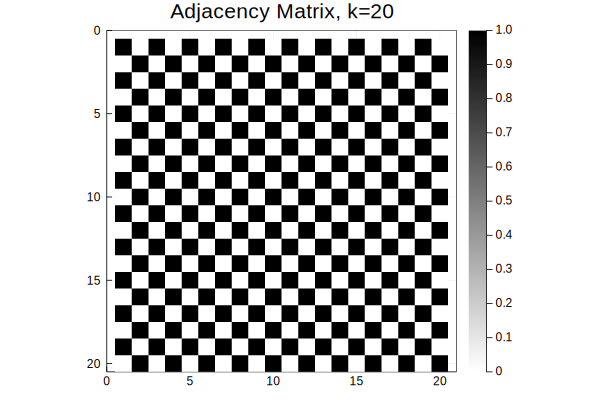

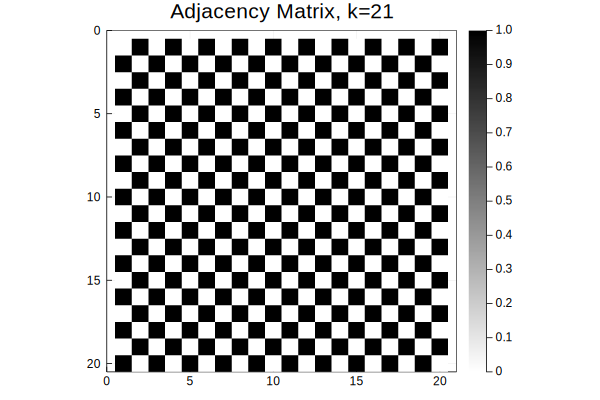

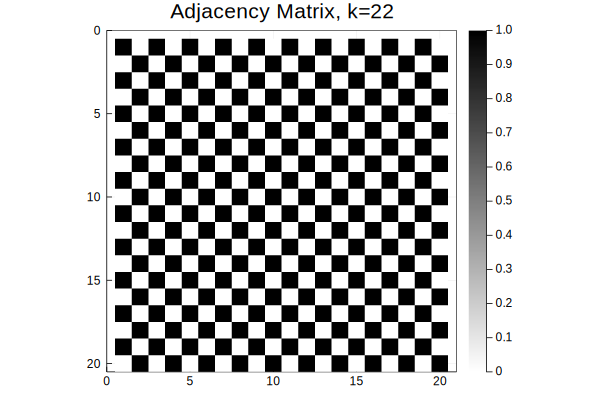

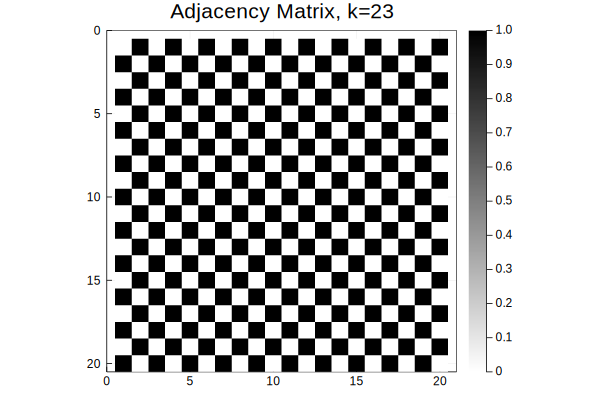

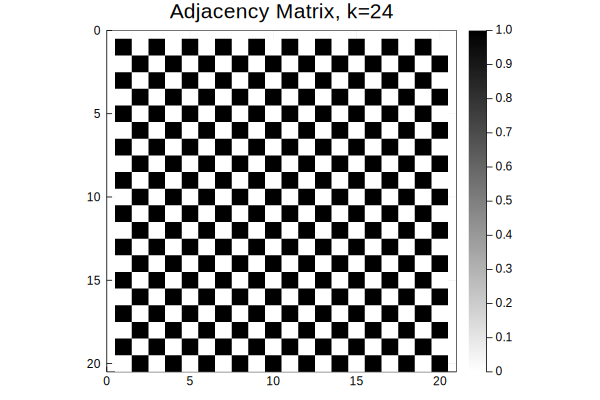

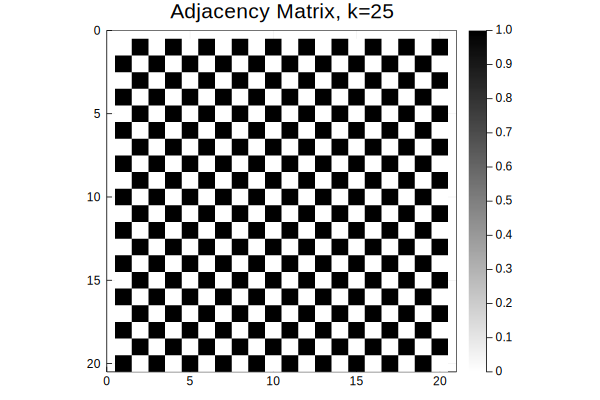

In [101]:
for i in 0:K_MAX   
    hVarX = vizMatrixThresh(Adj_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"./figures/adjmatrixPowThresh$(i).png")    
end


In [102]:
adjMatrixNorm = adjacency2Smatrix(deepcopy(adjMatrixK1))
Adj_Normed_Dict = Dict()
for i in 0:K_MAX   
    Adj_Normed_Dict[i] = adjMatrixNorm^i
end

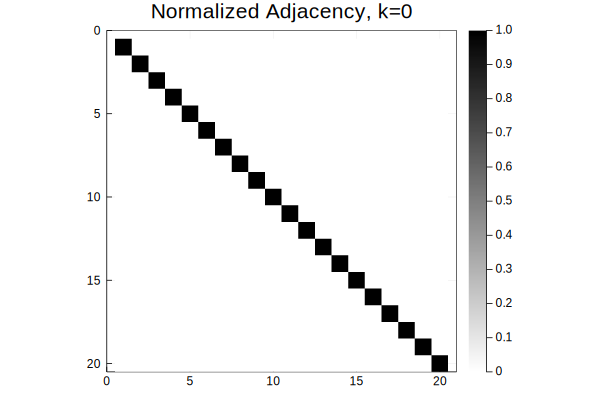

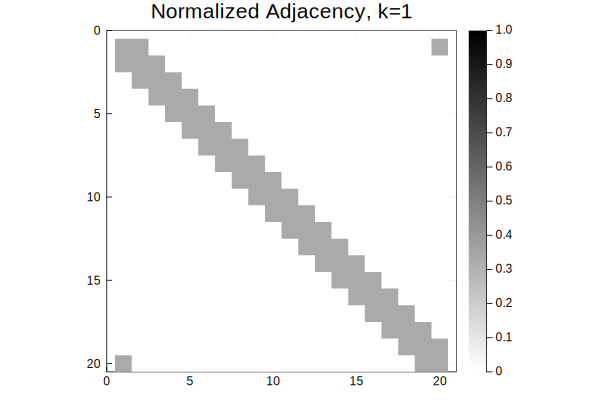

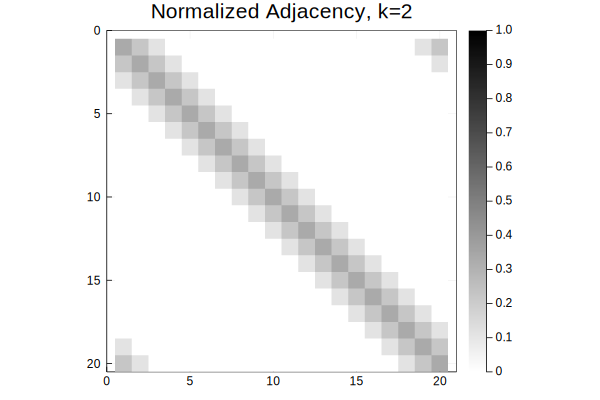

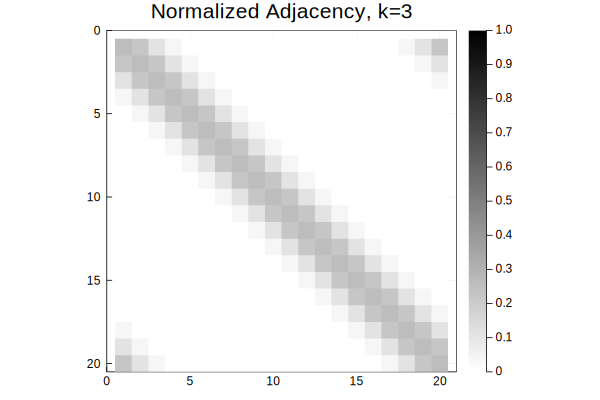

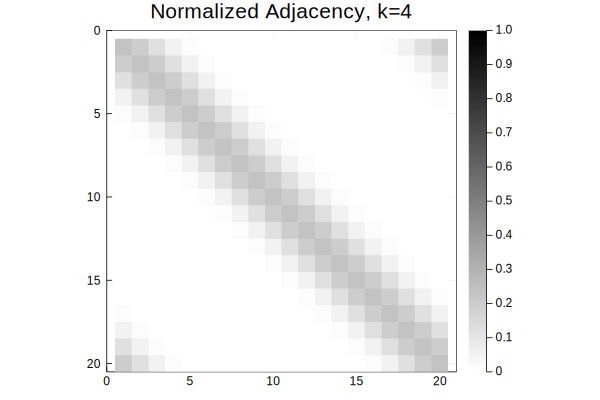

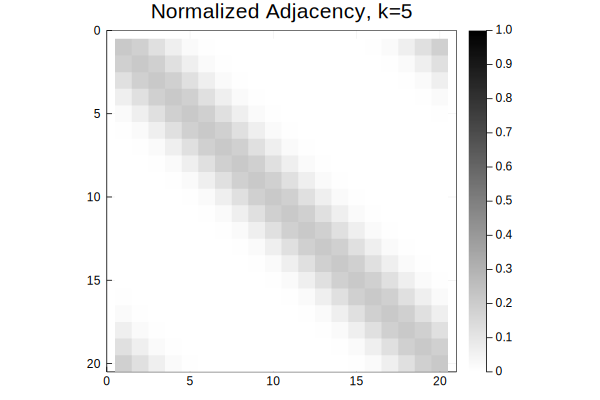

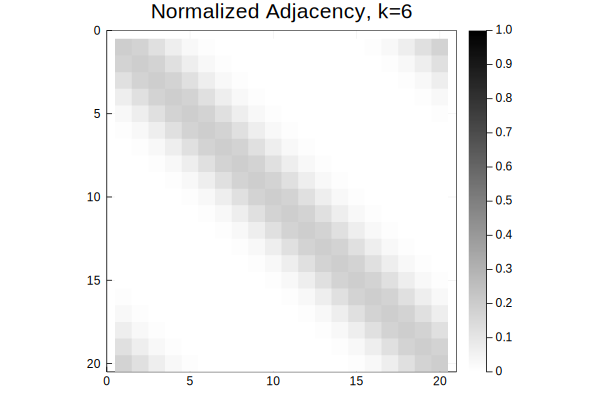

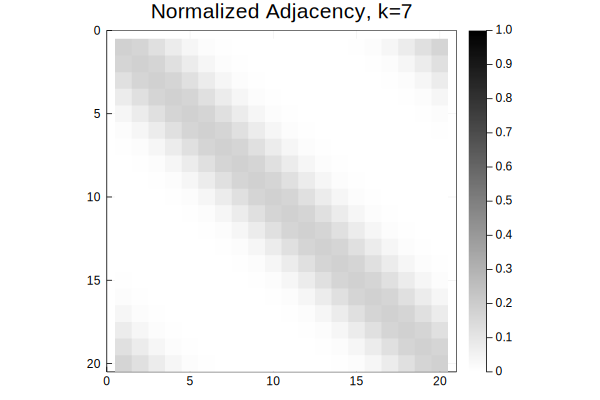

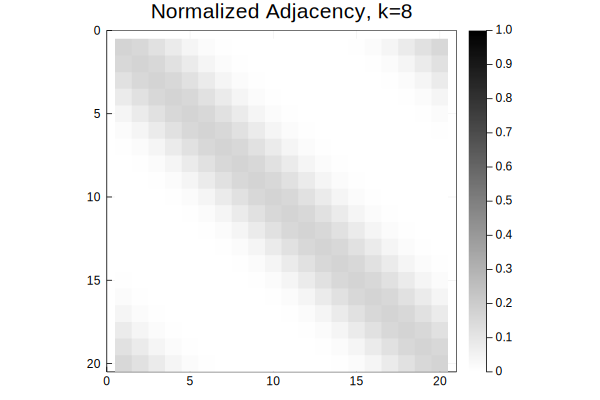

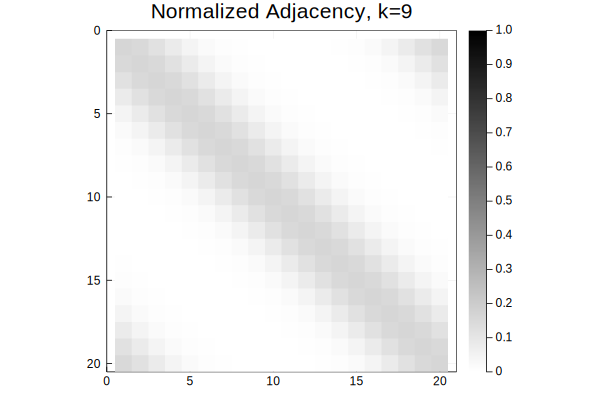

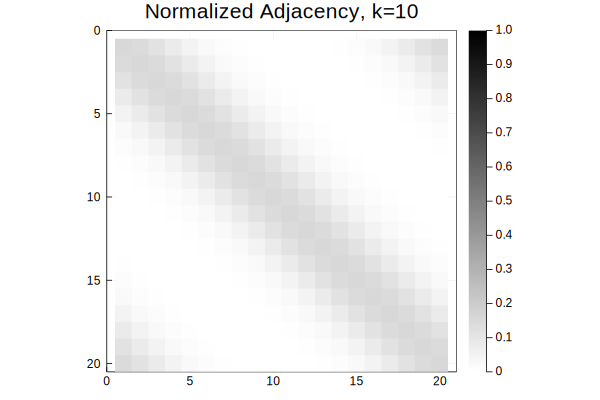

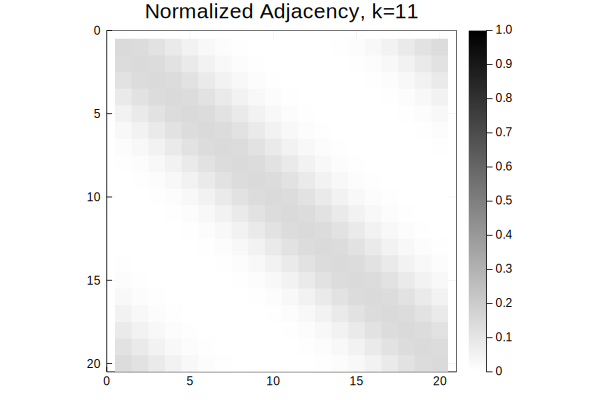

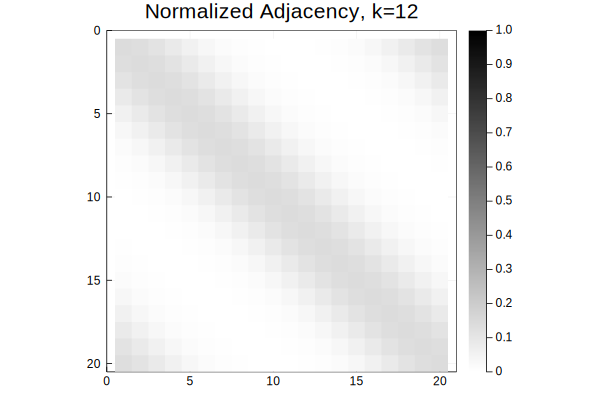

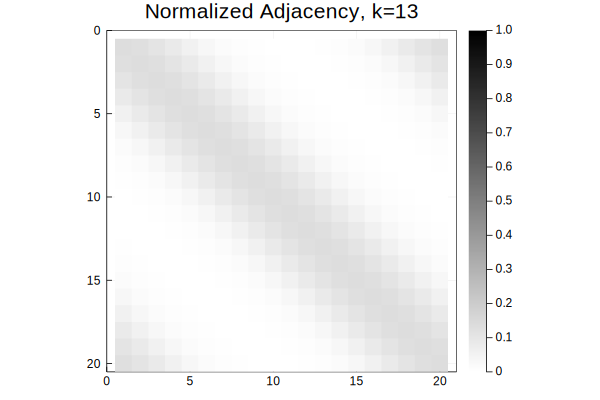

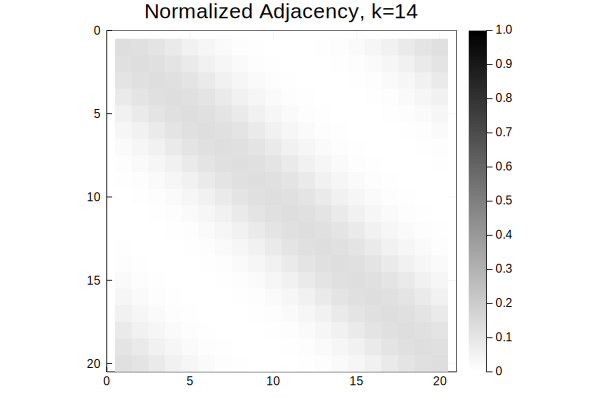

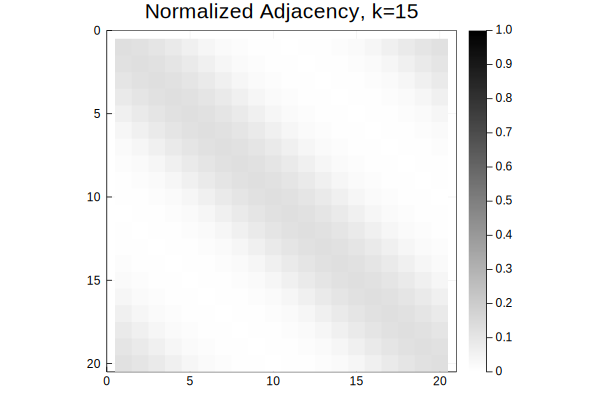

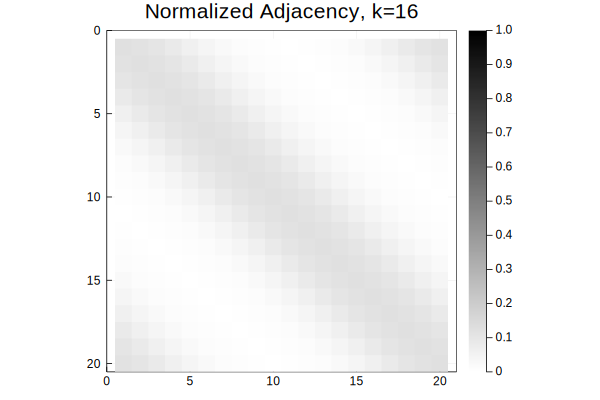

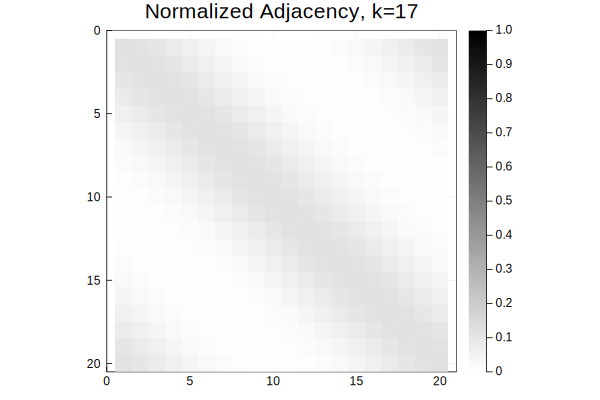

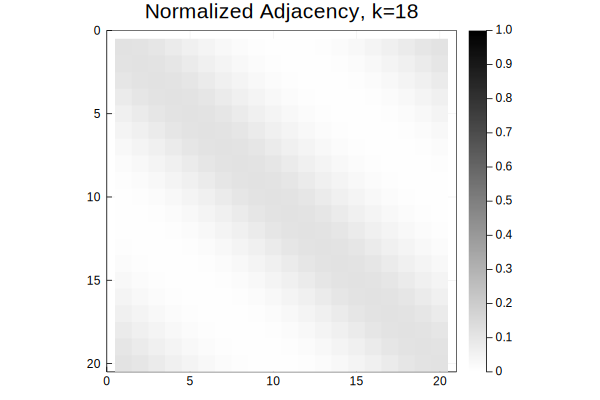

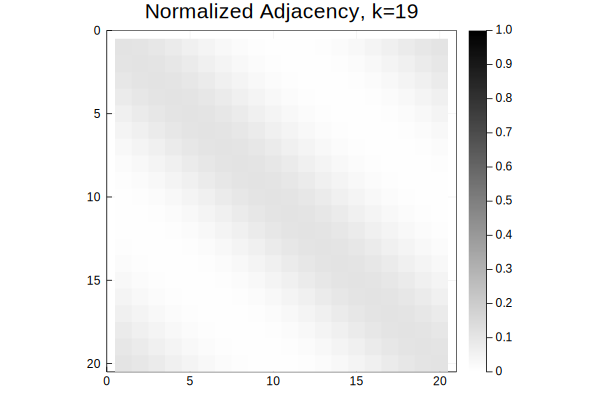

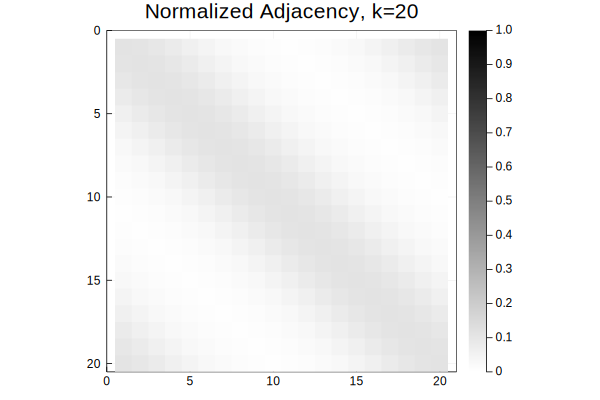

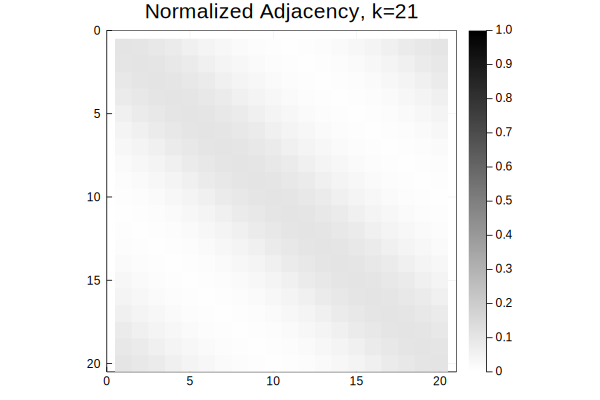

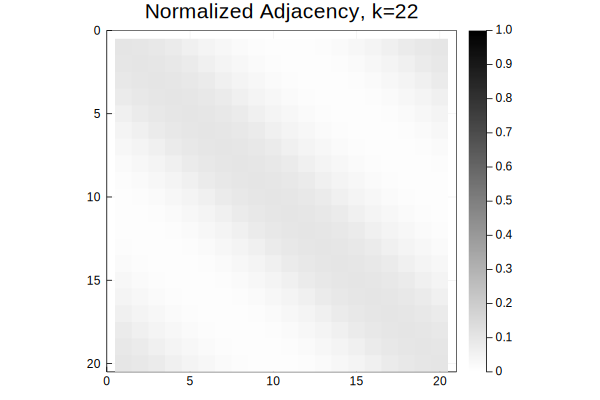

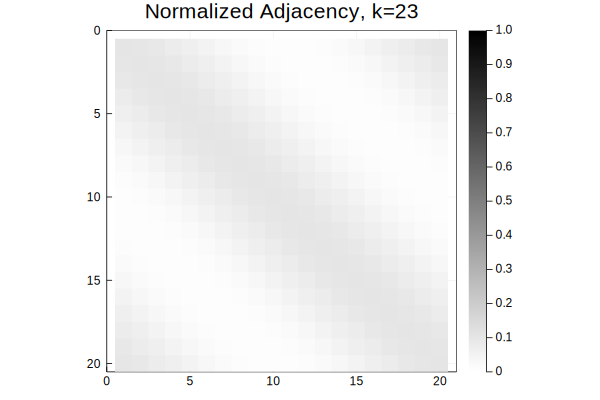

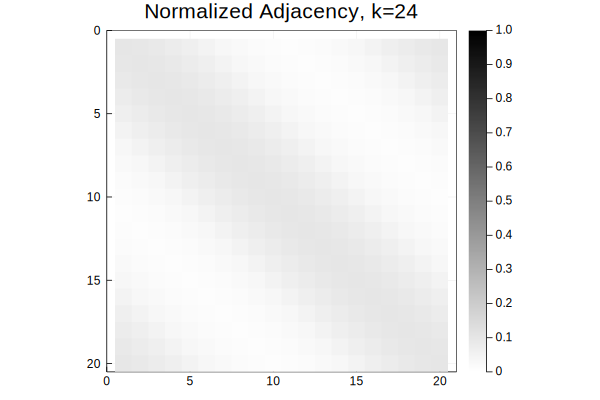

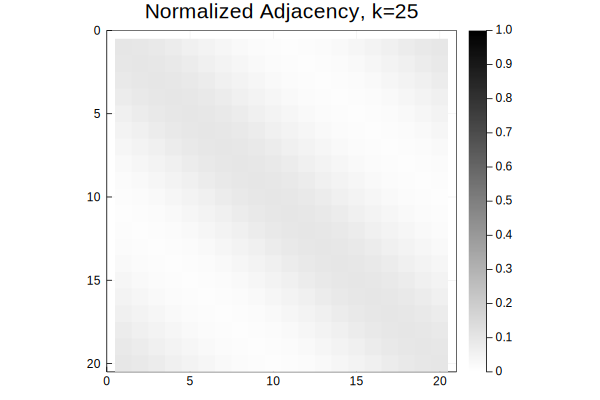

In [103]:
for i in 0:K_MAX   
    hVarX = vizMatrixNormedThresh(Adj_Normed_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"./figures/adjnormedmatrixPow$(i).png")    
end

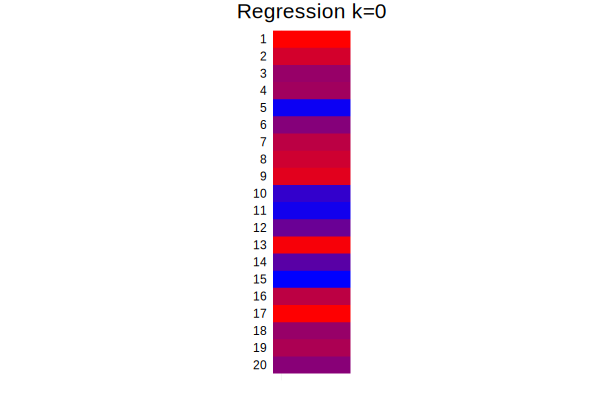

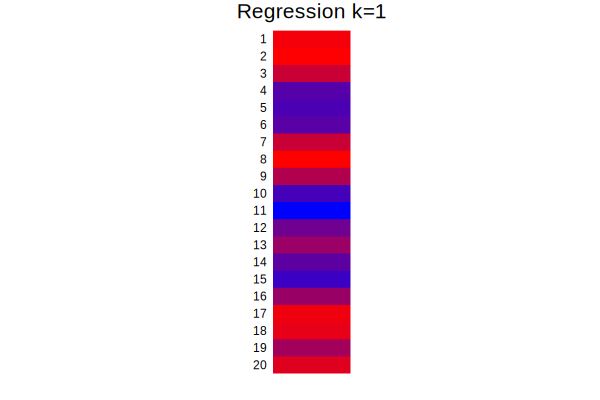

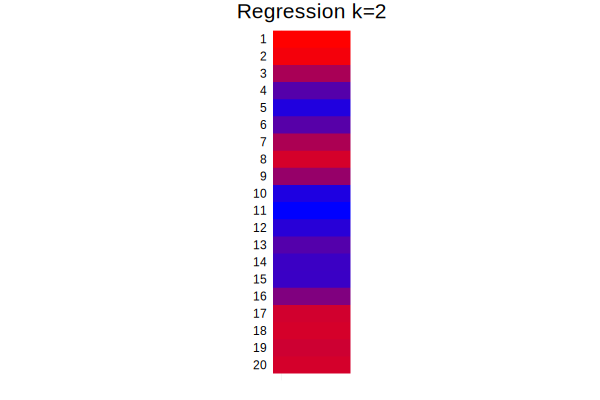

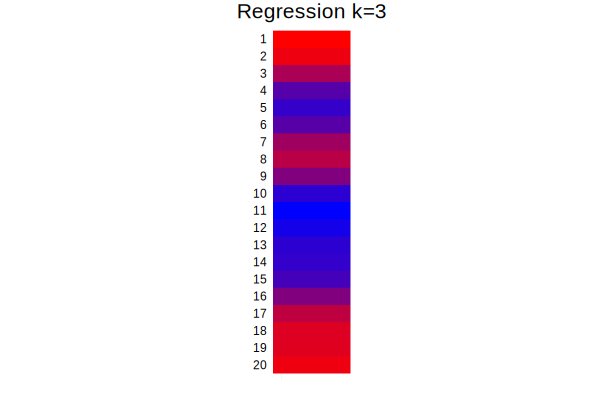

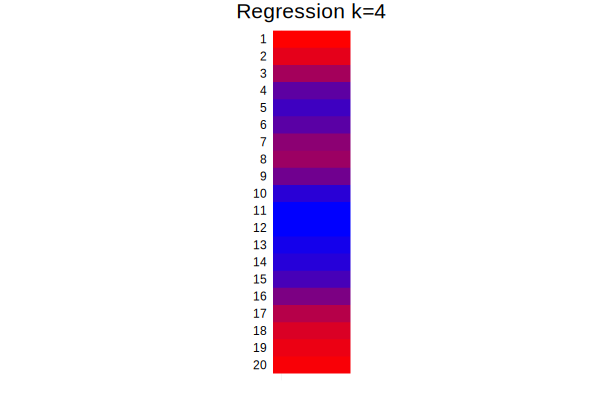

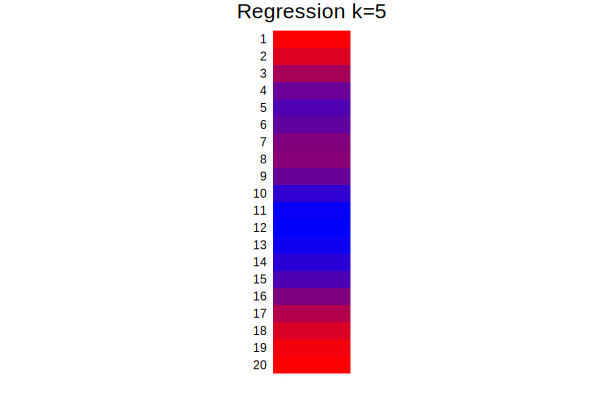

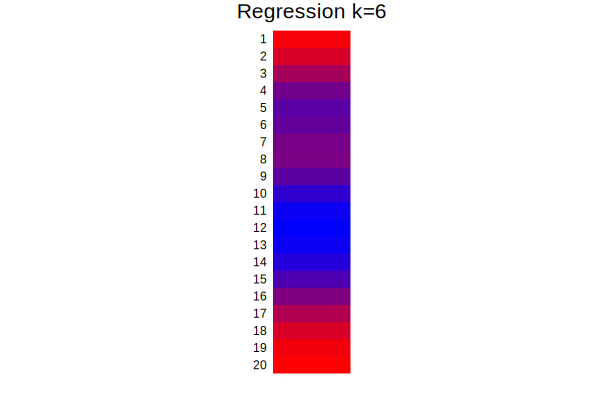

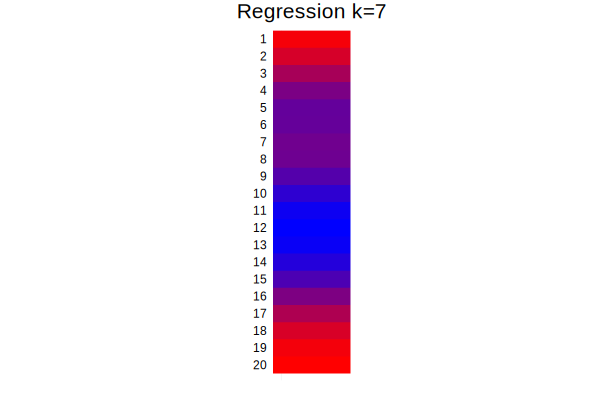

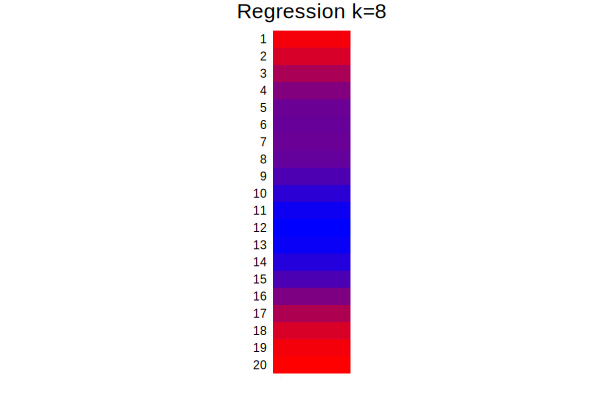

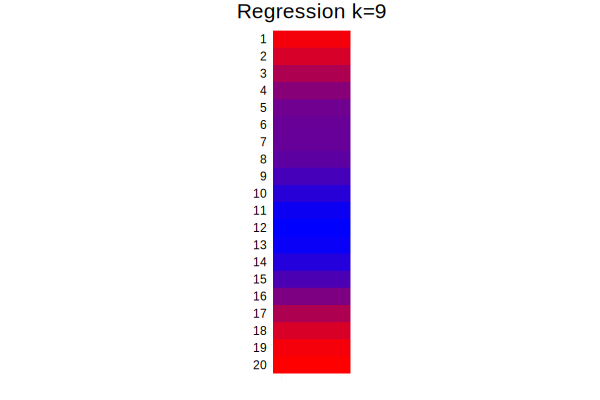

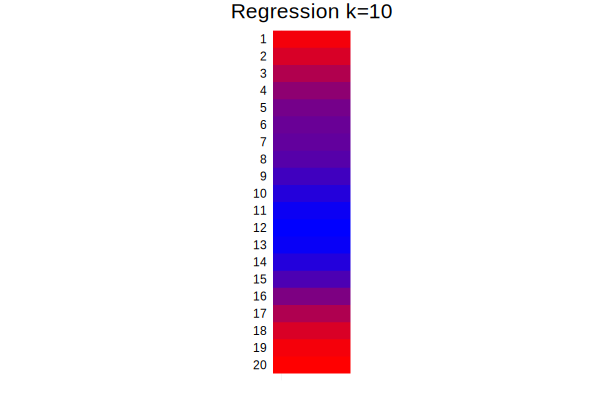

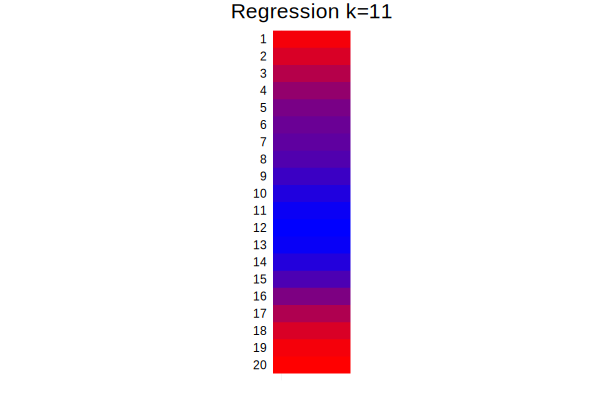

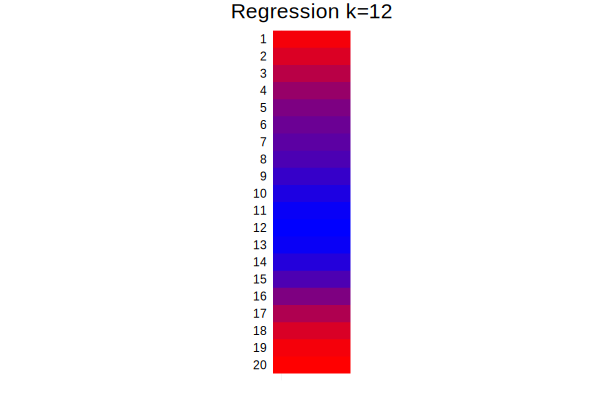

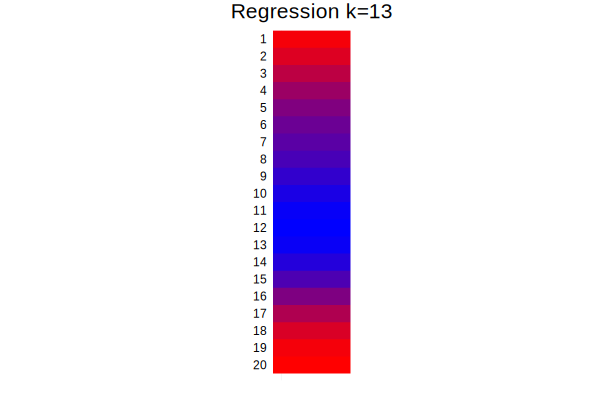

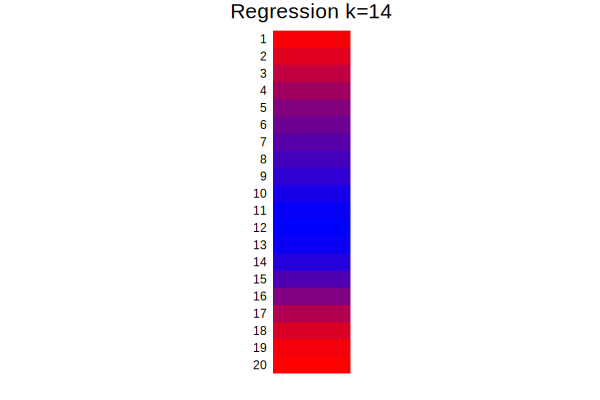

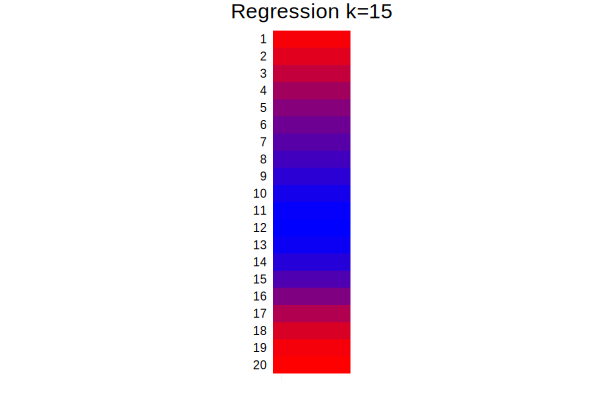

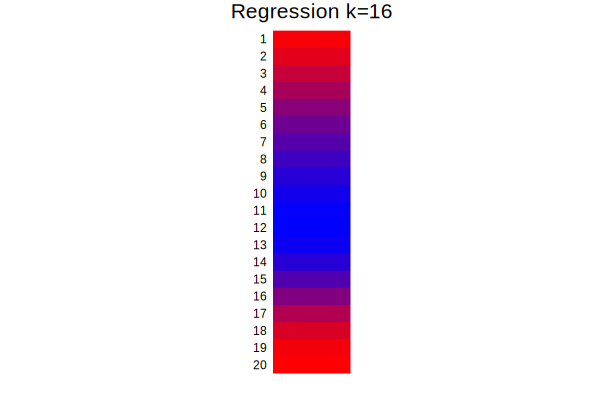

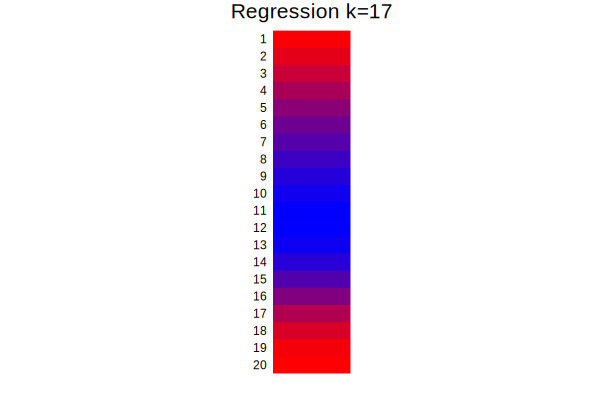

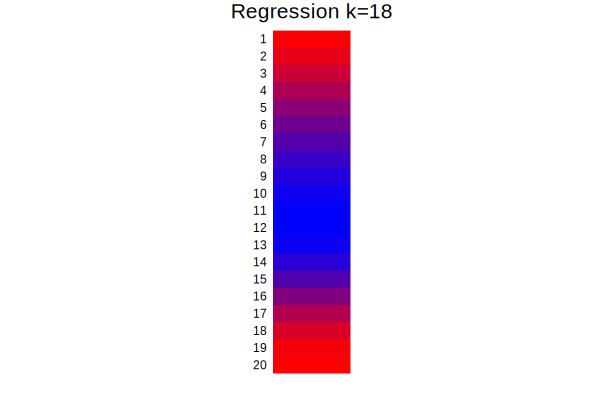

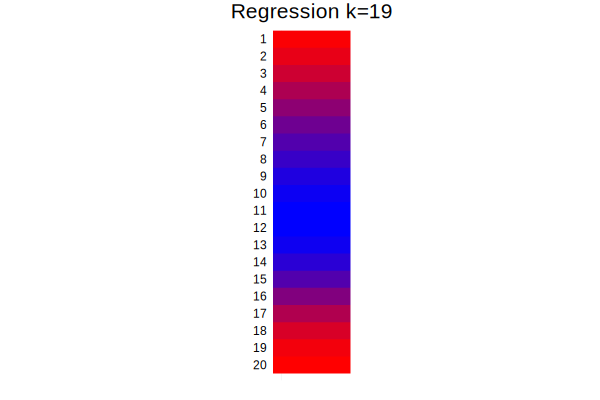

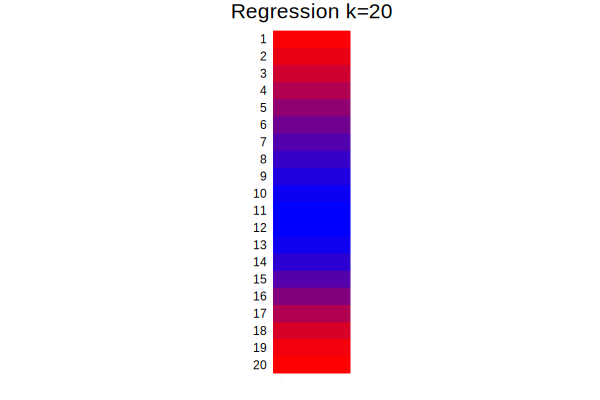

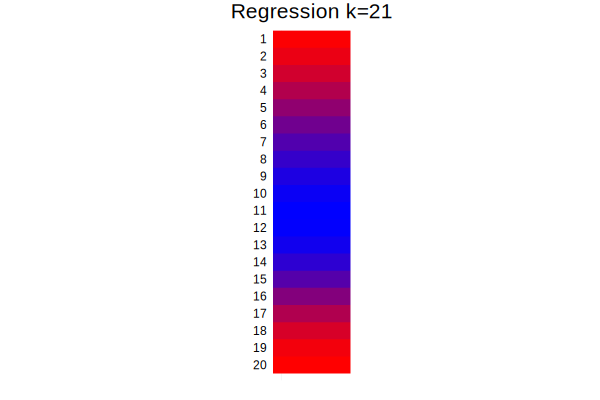

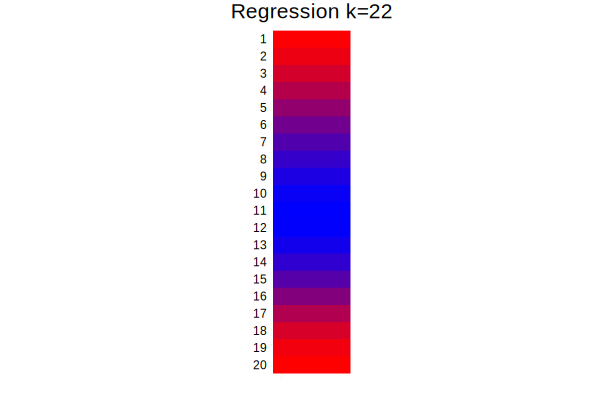

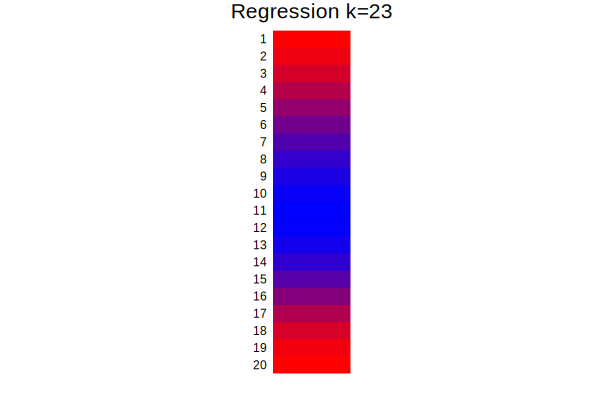

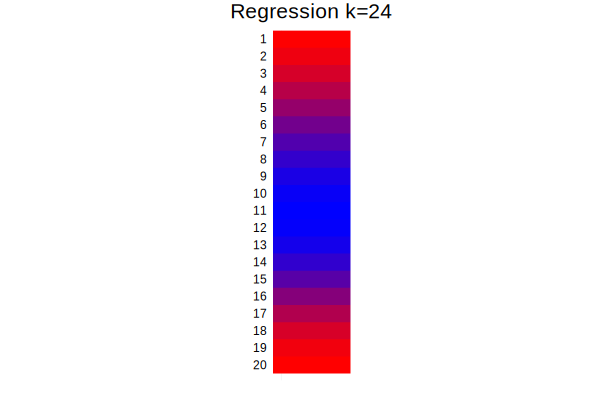

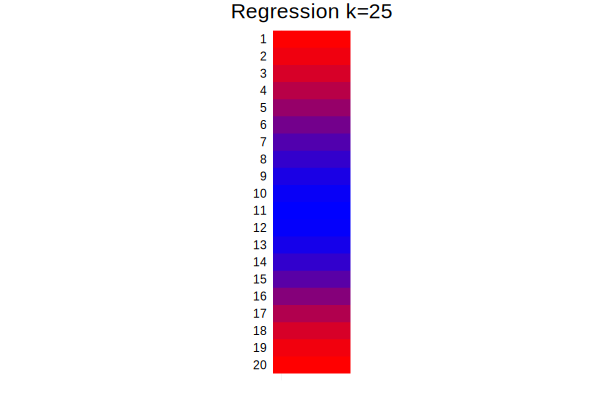

In [179]:
#network feature propagation 
feature_Regression = Dict()
for i in 0:K_MAX   
    feature_Regression[i] = Adj_Normed_Dict[i] * varX
end

for i in 0:K_MAX   
    hVarX = displayProjectedFeature(feature_Regression[i],i) 
    p3=plot(hVarX,layout=1)
    display(p3)
    savefig(p3,"./figures/RegressionPow$(i).png")    
end



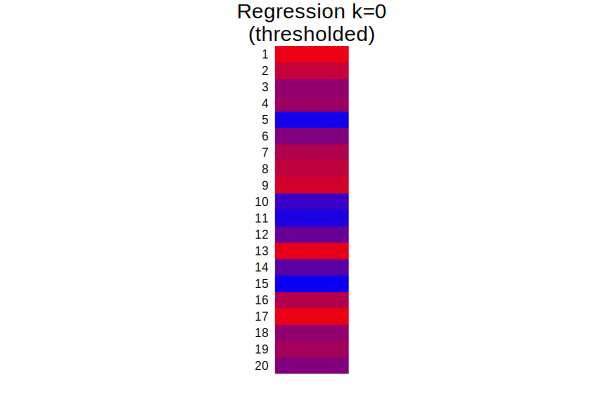

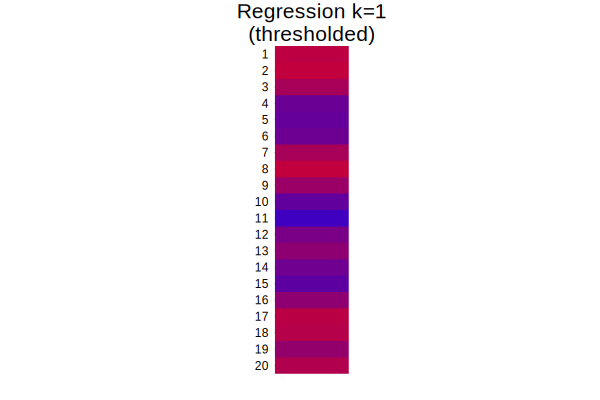

[0.8605035951322004; 0.5536701471693728; 0.1397368075270382; 0.20983624307643822; -0.8358170542034236; 0.009869313361311693; 0.38594817181741203; 0.5173412144791723; 0.6571499784512624; -0.5566064320385018; -0.7895121469058344; -0.17267839992051837; 0.8016715816087185; -0.2899107489947583; -0.9112444661649506; 0.3947417465059855; 0.8501963169312137; 0.13610649967904775; 0.28210437987876347; 0.031369184336287104]


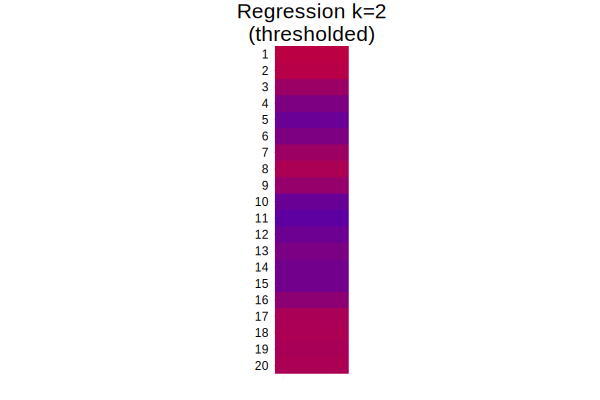

[0.4818476422126201; 0.5179701832762038; 0.3010810659242831; -0.1620813345333157; -0.20537049925522455; -0.1466665230082333; 0.30438623321929864; 0.5201464549159489; 0.20596158696397762; -0.2296562001643579; -0.5062656596216182; -0.05350632173921144; 0.11302747756448059; -0.13316121118366347; -0.26880448955124114; 0.11123119909074952; 0.46034818770541563; 0.42280239882967496; 0.14986002129803278; 0.391325719782417]


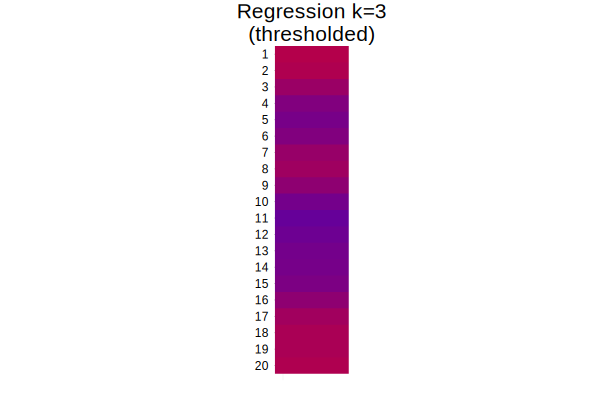

[0.4637145150904136; 0.43363296380436894; 0.21898997155572372; -0.022123589288085707; -0.17137278559892447; -0.01588359634805303; 0.2259553883756714; 0.3434980916997417; 0.1654839472385229; -0.1766534242739995; -0.2631427271750625; -0.148914834598783; -0.024546685119464756; -0.09631274105680798; -0.09691150054805169; 0.100924965748308; 0.3314605952086134; 0.34433686927770774; 0.3213293799700416; 0.3410111277643566]


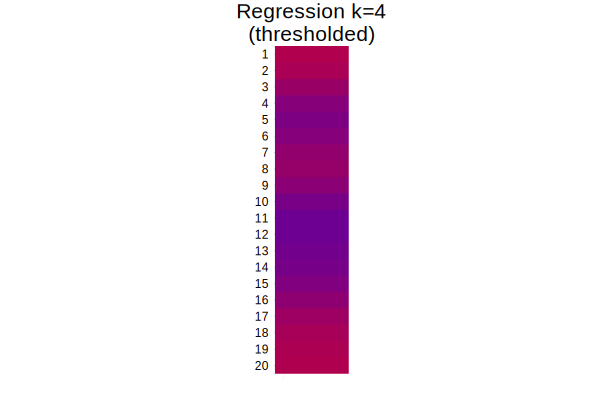

[0.41278620221971307; 0.37211248348350207; 0.210166448690669; 0.008497865556237813; -0.06979332374502108; 0.012899668809564613; 0.1845232945757867; 0.24497914243797866; 0.11077620488808836; -0.09143740140351303; -0.19623699534928163; -0.14553474896443677; -0.08992475359168524; -0.07259030890810814; -0.030766425285517193; 0.11182468680295658; 0.2589074767448764; 0.3323756148187876; 0.33555912567070195; 0.37535167427493726]


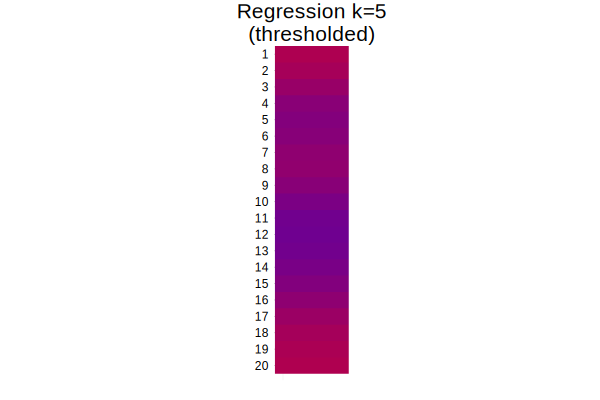

[0.38675011999271747; 0.3316883781312947; 0.19692559924346964; 0.04962366350062855; -0.016131929793072902; 0.0425432132134434; 0.14746736860777668; 0.18009288063395124; 0.08810598197418468; -0.058966063954902115; -0.1444030485724105; -0.14389883263513456; -0.10268327048807671; -0.0644271625951035; 0.0028226508697770936; 0.11332191275410522; 0.23436925945554016; 0.30894740574478863; 0.34776213825480895; 0.3745656673884508]


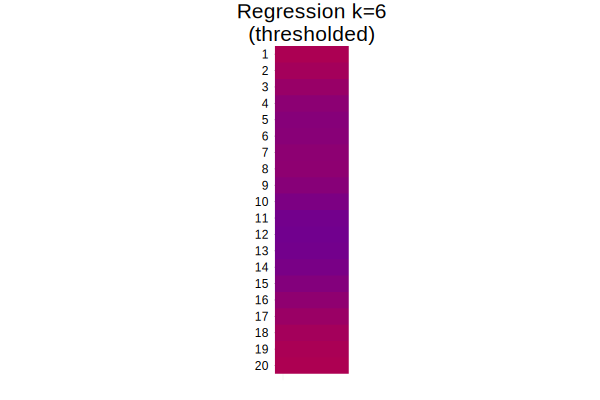

[0.36433472183748766; 0.3051213657891606; 0.19274588029179762; 0.07680577765034177; 0.025344982306999664; 0.057959550676049076; 0.12336782081839043; 0.13855541040530417; 0.06974426621774457; -0.03842104351770932; -0.11575598172081568; -0.13032838389854057; -0.10366975523943825; -0.05476259407113446; 0.017239133676259594; 0.11683794102647417; 0.21887952598481136; 0.29702626781837926; 0.3437584037960161; 0.369692641878659]


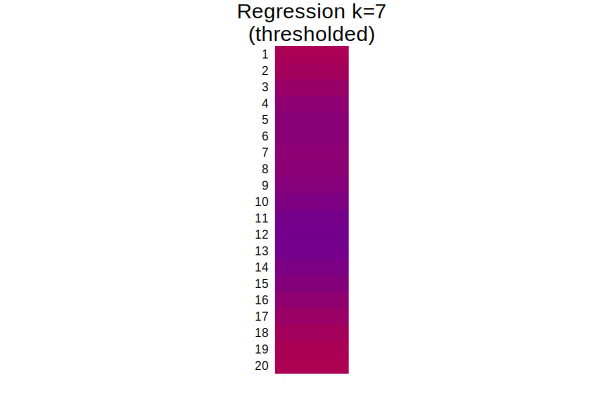

[0.34638290983510245; 0.2874006559728153; 0.19155767457710002; 0.09829888008304638; 0.05337010354446345; 0.06889078460047969; 0.10662759396658122; 0.11055583248047977; 0.056626211035113186; -0.028144253006926814; -0.09483513637902191; -0.1165847069529315; -0.09625357773637104; -0.047064405211437677; 0.02643816021053305; 0.11765220022918171; 0.21091457827655496; 0.2865547325330689; 0.3368257711643515; 0.3592619225040543]


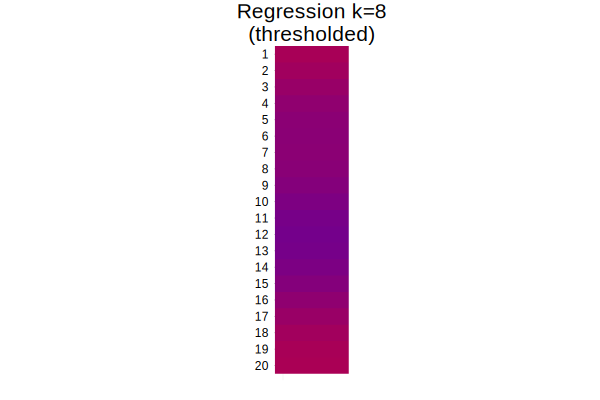

[0.3310151627706573; 0.27511374679500594; 0.19241907021098723; 0.11440888606820328; 0.07351992274266322; 0.07629616070384149; 0.09535807034918023; 0.09126987916072474; 0.04634593016955538; -0.022117726116945166; -0.07985469877962675; -0.1025578070227748; -0.08663422996691343; -0.03895994091242522; 0.03234198507609237; 0.1183349795720899; 0.20504050367960186; 0.27809836065799176; 0.3275474754004915; 0.347490201167836]


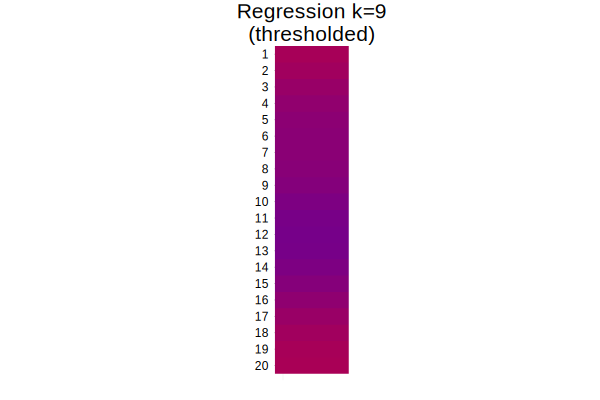

[0.3178730369111664; 0.2661826599255501; 0.19398056769139882; 0.1267826263406179; 0.08807498983823603; 0.08172471793189498; 0.08764137007124881; 0.07765795989315344; 0.03849936107111162; -0.018542164909005496; -0.06817674397311553; -0.08968224525643834; -0.07605065930070455; -0.031084061934415375; 0.03723900791191906; 0.11857248944259469; 0.2004912813032279; 0.270228779912695; 0.3177120124087731; 0.3353509464463283]


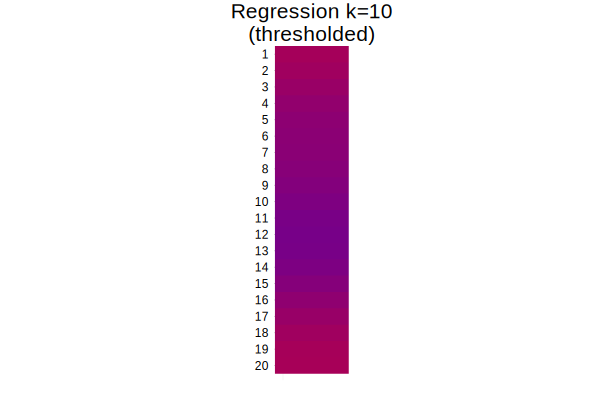

[0.3064688810943483; 0.25934542150937173; 0.19564861798585562; 0.1362793946234176; 0.09886077803691629; 0.08581369261379326; 0.08234134929876573; 0.06793289701183794; 0.032538385351753234; -0.01607318260366978; -0.05880038471285311; -0.07796988284341944; -0.0656056554971861; -0.023298571107733645; 0.04157581180669942; 0.1187675928859139; 0.19643085021950585; 0.26281069120823203; 0.3077639129225988; 0.3236453319220893]


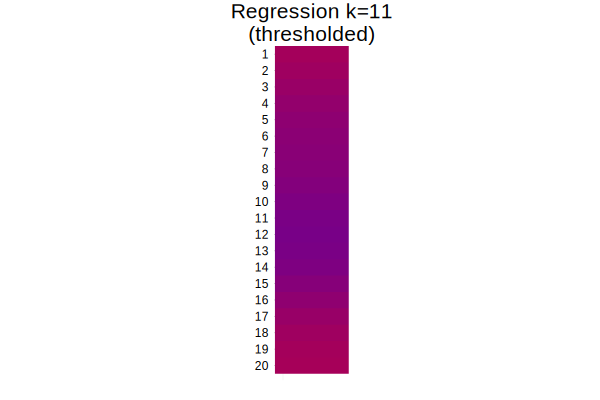

[0.2964865448419364; 0.2538209735298586; 0.19709114470621497; 0.1435962635487298; 0.10698462175804237; 0.08900527331649179; 0.07869597964146564; 0.060937543887452275; 0.02813269991997376; -0.014111727321589905; -0.05094781671998079; -0.06745864101781958; -0.05562470314944638; -0.01577613826607341; 0.04568161119495992; 0.1189247516373731; 0.19266971143788394; 0.2556684847834456; 0.29807331201764004; 0.3126260419796788]


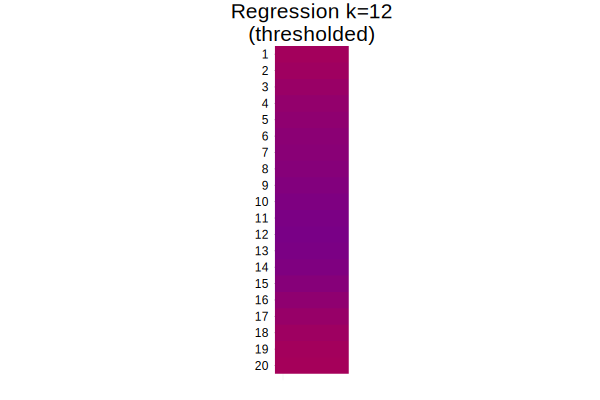

[0.2876445201171579; 0.24913288769267; 0.1981694605949345; 0.14922401000432908; 0.11319538620775463; 0.09156195823866659; 0.07621293228180324; 0.05592207448296393; 0.02498617216194541; -0.012308948040532314; -0.04417272835313009; -0.05801038696241556; -0.04628649414444644; -0.008573076740186647; 0.04961007485541982; 0.11909202475673894; 0.18908764928623417; 0.24880383607965645; 0.28878927959358813; 0.3023952996130851]


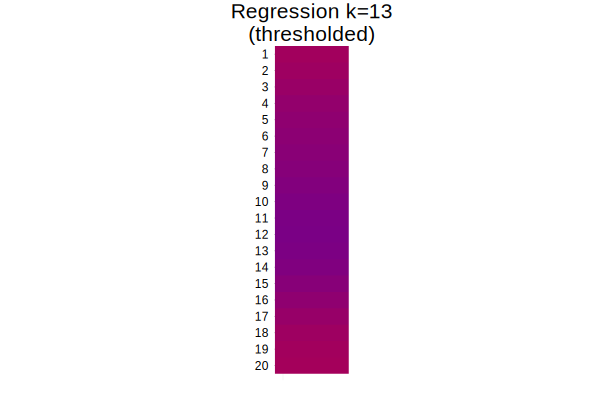

[0.27972423580763767; 0.2449822894682541; 0.19884211943064453; 0.1535296189356727; 0.11799378481691675; 0.09365675890940817; 0.07456565500114458; 0.052373726308904175; 0.02286643286812569; -0.010498501410572361; -0.03816402111869266; -0.049489869819997395; -0.03762331928234955; -0.0017498320097377729; 0.05337634095732405; 0.11926324963279764; 0.18566117004087654; 0.24222692165315962; 0.2799961384287765; 0.2929430331079437]


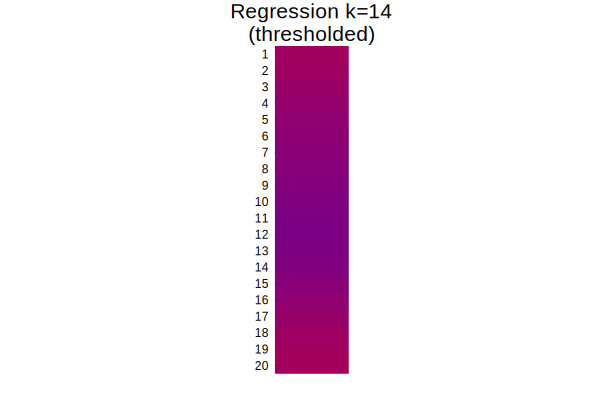

[0.2725498527946118; 0.2411828815688454; 0.19911800927819046; 0.15678850772774466; 0.12172672088733258; 0.0954053995758232; 0.07353204673981899; 0.0499352713927248; 0.02158055258881917; -0.008598696553713127; -0.03271746411642078; -0.04175907007367981; -0.029621007037361605; 0.0046677298884121865; 0.056963252860128016; 0.1194335868769994; 0.18238378044227796; 0.2359614100409376; 0.2717220310632933; 0.2842211357814526]


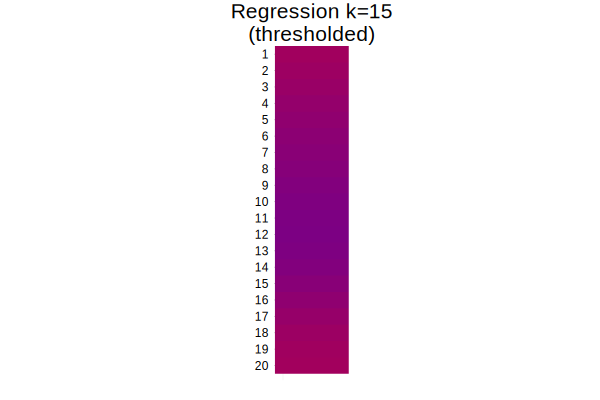

[0.2659846233816366; 0.2376169145472159; 0.19902979952492686; 0.15921107929775588; 0.12464020939696682; 0.09688805573432492; 0.07295757256945562; 0.048349290240454285; 0.020972375809276966; -0.006578536027104918; -0.027691743581271244; -0.03469918040915407; -0.022237449074209742; 0.010669991903726223; 0.06035485654184655; 0.1195935400598018; 0.17925959245340495; 0.23002240718216962; 0.2639681922952278; 0.27616433987978595]


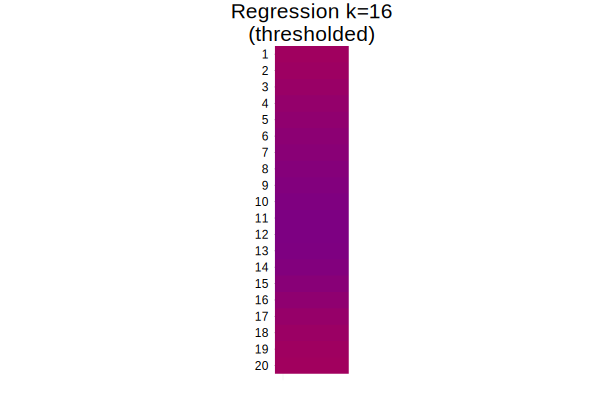

[0.25992195926954614; 0.23421044581792647; 0.19861926445663286; 0.16096036273988318; 0.1269131148096825; 0.09816194590024911; 0.07273163951474496; 0.04742641287306233; 0.020914376674208805; -0.00443263459969976; -0.02298982000584346; -0.028209457688211703; -0.015422212526545825; 0.016262466457120955; 0.06353946283512481; 0.11973599635168442; 0.17629184656512548; 0.22441673064360074; 0.25671831311906107; 0.2687057185188835]


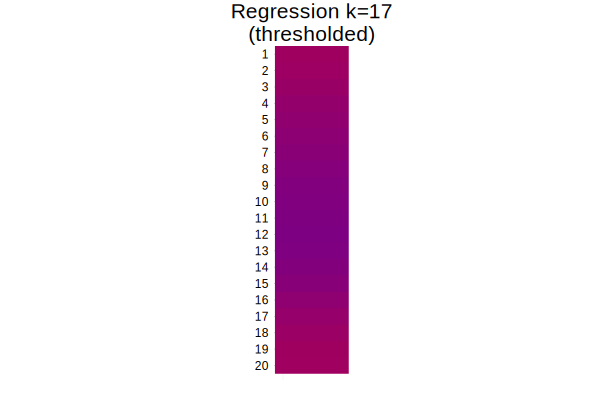

[0.2542793745354521; 0.23091722318136848; 0.19793002433814746; 0.16216424733539958; 0.12867847448327155; 0.09926890007489221; 0.0727733327626855; 0.047024143020672024; 0.021302718315857123; -0.0021693593104448114; -0.018543970764584944; -0.022207163406867014; -0.009123067919212177; 0.02145990558856667; 0.0665126418813101; 0.11985576858397826; 0.17348152452013685; 0.21914229677592906; 0.24994692076051508; 0.26178199696916354]


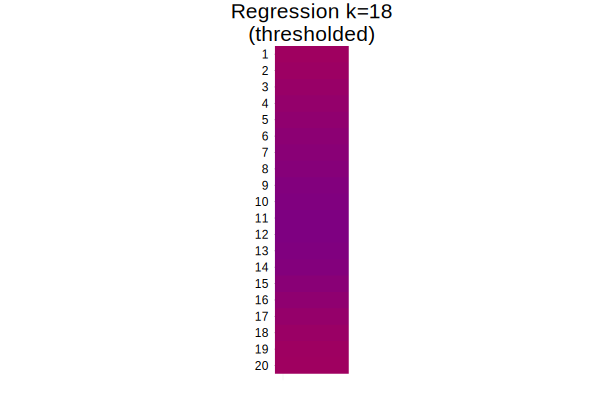

[0.24899286489532801; 0.22770887401832265; 0.19700383161830515; 0.1629242487189395; 0.13003720729785445; 0.10024023577361639; 0.07302212528608322; 0.047033398033071536; 0.02205250067536145; 0.00019646274694246763; -0.01430683116063225; -0.01662473403022137; -0.003290108579170836; 0.026283159850221505; 0.06927610535128495; 0.1199499783284751; 0.17082652996001474; 0.21419024735219366; 0.24362373816853594; 0.25533609742171026]


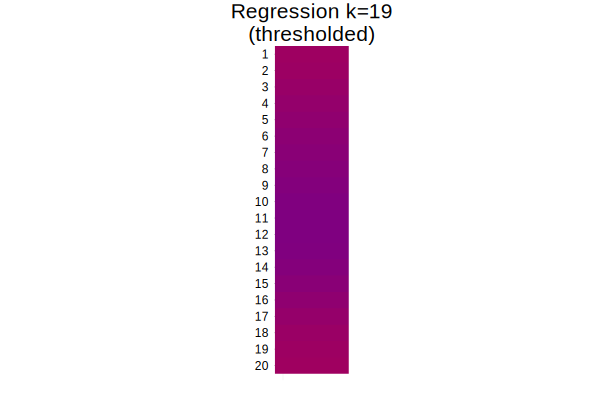

[0.24401261211178696; 0.22456852351065193; 0.19587898478518911; 0.16332176254503306; 0.13106723059680345; 0.10109985611918469; 0.07343191969759041; 0.0473693413315054; 0.023094120485125165; 0.002647377420557248; -0.010245034147970386; -0.011407224590008189; 0.0021227724136097664; 0.030756385540778558; 0.07183641450999387; 0.12001753787992495; 0.16832225188022787; 0.20954683849358147; 0.2377166943141466; 0.2493175668285247]


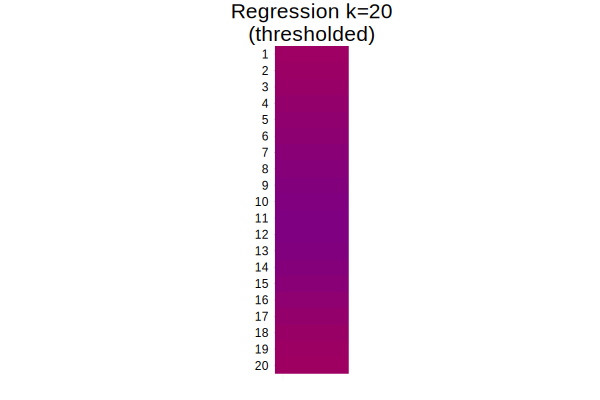

[0.2392995674836545; 0.22148670680254268; 0.19458975694695801; 0.1634226593090085; 0.13182961642034038; 0.10186633547119285; 0.07396703904942685; 0.04796512717140699; 0.024370279745729265; 0.005165487919237363; -0.006334960439140433; -0.006509828774789547; 0.007157311121460078; 0.034905190821460735; 0.07420344597689908; 0.1200587347567155; 0.1659622094179114; 0.205195261562652; 0.23219369987875088; 0.24368229108481942]


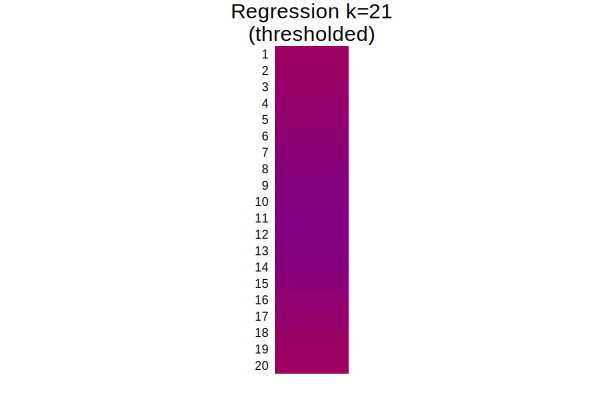

[0.2348228551236722; 0.2184586770777184; 0.19316637435283643; 0.16328067755876896; 0.1323728704001806; 0.10255433031365335; 0.07459950056400887; 0.04876748198885434; 0.0258336316121245; 0.0077336024086087155; -0.0025597670982308723; -0.0018958260308232777; 0.011850891056043783; 0.03875531597327331; 0.0763891238516918; 0.12007479671717533; 0.16373873524575966; 0.20111705695310478; 0.2270237508420741; 0.23839185281574163]


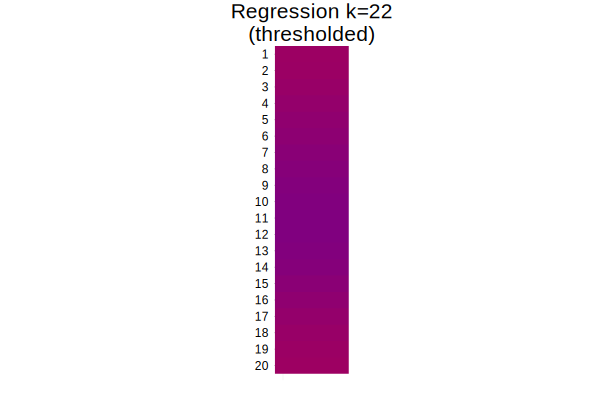

[0.23055779500571078; 0.21548263551807567; 0.19163524299644122; 0.1629399741039287; 0.13273595942420097; 0.10317556709261429; 0.07530710428883884; 0.04973353805499592; 0.027444905336529213; 0.010335822307500804; 0.0010926697598515195; 0.0024650993089964934; 0.016236793666164567; 0.04233177696033624; 0.07840641218071348; 0.12006755193820891; 0.16164352963867992; 0.19729318101364615; 0.2221775535369735; 0.23341281959382928]


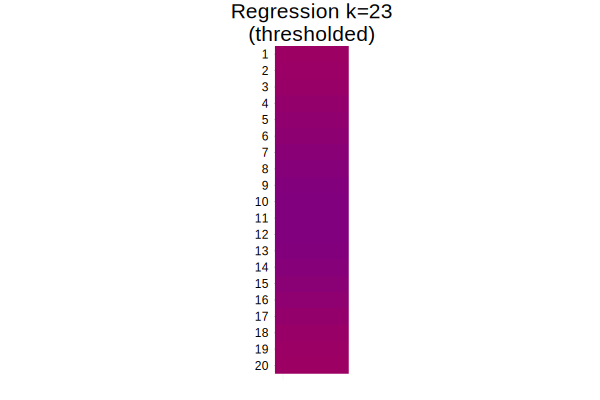

[0.22648441670587185; 0.21255855784007588; 0.19001928420614855; 0.16243705884152365; 0.13295050020691465; 0.1037395436018847; 0.07607206981214967; 0.05082851589345463; 0.029171421899675275; 0.012957799134627197; 0.004631197125449571; 0.006598187578337508; 0.020344556645165823; 0.04565832760240485; 0.0802685803597529; 0.12003916458586747; 0.15966808753017833; 0.1937047547297665; 0.21762785138148297; 0.2287160560455045]


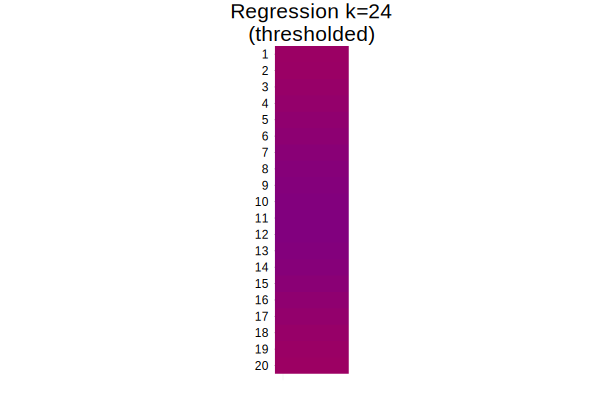

[0.2225863435304841; 0.20968741958403214; 0.18833830029591603; 0.16180228108486228; 0.13304236755010768; 0.10425403787364965; 0.07688004310249633; 0.052024002535093226; 0.030985912309252364; 0.015586806053250697; 0.00806239461280478; 0.010524647116317648; 0.024200357275302675; 0.04875715486910781; 0.08198869084934177; 0.11999194415859954; 0.15780400228193742; 0.19033356454714262; 0.21334955405225137; 0.22427610804428644]


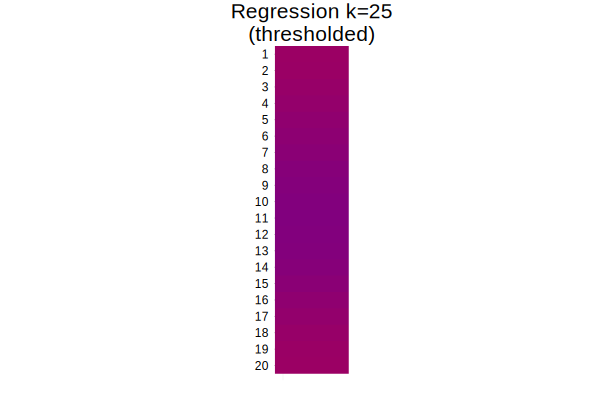

[0.21884995705293425; 0.20687068780347742; 0.18660933365493682; 0.16106098297696197; 0.1330328955028732; 0.10472548284208455; 0.0777193611704131; 0.05329665264894732; 0.03286557363253209; 0.01821170432510262; 0.011391282594124377; 0.01426246633480839; 0.02782738642024267; 0.051648734331250695; 0.08357926329234971; 0.1199282124299596; 0.15604317032922652; 0.1871623736271104; 0.2093197422145601; 0.2200706685423406]
[0.2152637711329174; 0.20410999283711612; 0.1848470014784587; 0.160234404044924; 0.13293978710730658; 0.1051592465051236; 0.0785804988871483; 0.054627195817297476; 0.03479131020219402; 0.020822853517253048; 0.014621817751345086; 0.017827045116391826; 0.031246195695433965; 0.054351794681281054; 0.08505207001785331; 0.11985021535051193; 0.1543779187954322; 0.18417509539029903; 0.20551759479467036; 0.21608012260327839]


In [192]:
#network feature propagation 
feature_Regression = Dict()
for i in 0:K_MAX   
    feature_Regression[i] = Adj_Normed_Dict[i] * varX
end

for i in 0:K_MAX   
    hVarX = displayProjectedFeatureThres(feature_Regression[i],i) 
    p3=plot(hVarX,layout=1)
    display(p3)
    savefig(p3,"./figures/RegressionPowThres$(i).png")  
    println(feature_Regression[i])
end


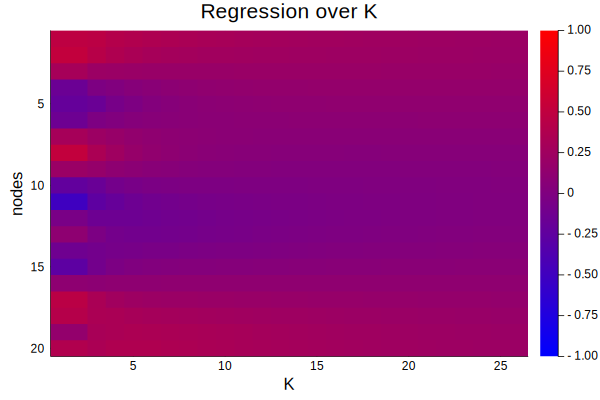

In [198]:
classVec = feature_Regression[1]

for i in 1:K_MAX   
    classVec = hcat(classVec,feature_Regression[i])
end
h1 = heatmap(classVec,fill=cgrad([:blue,:red]),clims=(-1,1),yaxis=:flip)
title!("Regression over K")
xlabel!("K")
ylabel!("nodes")
display(h1)
savefig(h1,"./figures/heatmapProgression.png") 

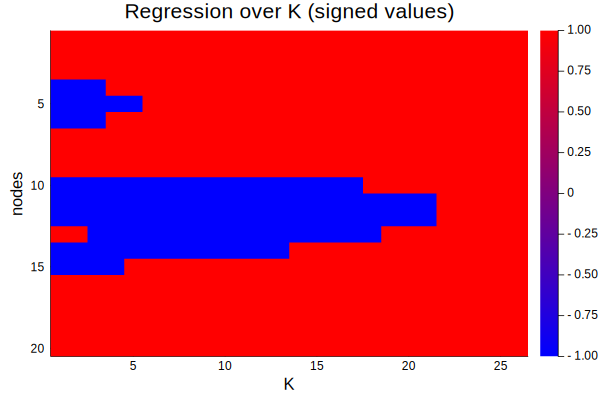

In [199]:
classVecSIGN = sign.(classVec)
h1 = heatmap(classVecSIGN,fill=cgrad([:blue,:red]),clims=(-1,1),yaxis=:flip)
title!("Regression over K (signed values)")
xlabel!("K")
ylabel!("nodes")
display(h1)
savefig(h1,"./figures/heatmapProgressionSIGN.png") 

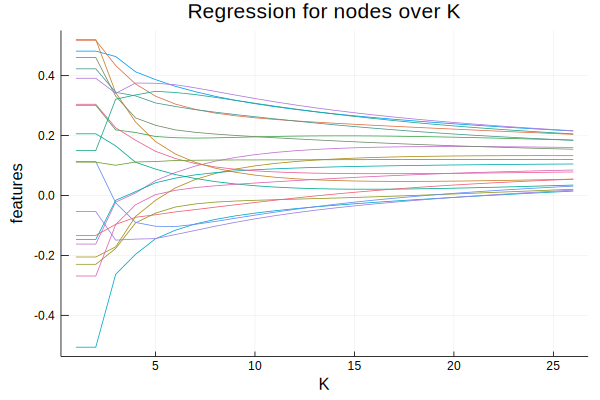

(1, 26)
[0.11372379658631185, 0.11372379658631185, 0.11372379658631188, 0.11372379658631188, 0.11372379658631185, 0.11372379658631182, 0.11372379658631188, 0.11372379658631185, 0.11372379658631185, 0.11372379658631185, 0.11372379658631185, 0.11372379658631185, 0.11372379658631182, 0.11372379658631188, 0.11372379658631185, 0.11372379658631182, 0.11372379658631185, 0.11372379658631182, 0.11372379658631182, 0.11372379658631185, 0.11372379658631182, 0.11372379658631182, 0.11372379658631185, 0.11372379658631182, 0.11372379658631182, 0.11372379658631182]


In [260]:
#now plot the lines for each node
println(size(mean(classVec,dims=1)))
println(vec(mean(classVec,dims=1)))
p1 = plot(classVec',leg=false)
title!("Regression for nodes over K")
xlabel!("K")
ylabel!("features")
display(p1)
savefig(p1,"./figures/classProgressionsIndividual.png") 

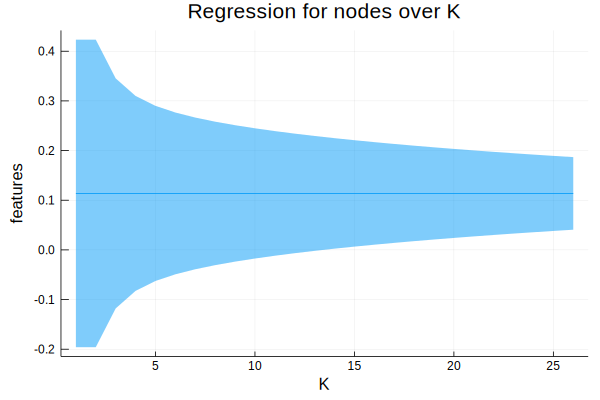

[0.11372379658631185, 0.11372379658631185, 0.11372379658631188, 0.11372379658631188, 0.11372379658631185, 0.11372379658631182, 0.11372379658631188, 0.11372379658631185, 0.11372379658631185, 0.11372379658631185, 0.11372379658631185, 0.11372379658631185, 0.11372379658631182, 0.11372379658631188, 0.11372379658631185, 0.11372379658631182, 0.11372379658631185, 0.11372379658631182, 0.11372379658631182, 0.11372379658631185, 0.11372379658631182, 0.11372379658631182, 0.11372379658631185, 0.11372379658631182, 0.11372379658631182, 0.11372379658631182]


In [261]:
cT = classVec; 
cTm = vec(mean(classVec,dims=1)); println(cTm)
p1 = plot(cTm,ribbon=vec(std(classVec,dims=1)),leg=false)
title!("Regression for nodes over K")
xlabel!("K")
ylabel!("features")
display(p1)
savefig(p1,"./figures/classProgressionsMeanStd.png") 

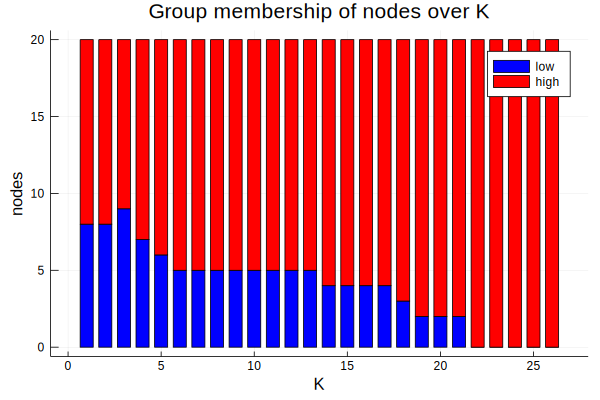

[8, 8, 9, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 2, 2, 2, 0, 0, 0, 0, 0]
[12, 12, 11, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 17, 18, 18, 18, 20, 20, 20, 20, 20]


In [262]:
lowTotals = [length(findall(classVec[:,i] .<= 0)) for i in 1:size(classVec)[2]]
highTotals = [length(findall(classVec[:,i] .> 0)) for i in 1:size(classVec)[2]]
println(lowTotals)
println(highTotals)
#now show the distribution between polar sides as total sum above or below
g1 = groupedbar(hcat(lowTotals,highTotals),label=["low" "high"],c=[:blue :red],
        bar_position = :stack, bar_width=0.7)
title!("Group membership of nodes over K")
xlabel!("K")
ylabel!("nodes")
display(g1)
savefig(g1,"./figures/groupProgressions.png") 

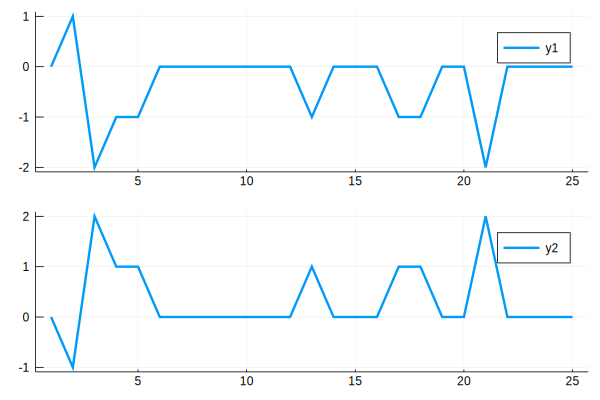

In [110]:

lowTotalsDiff = (diff(lowTotals))
highTotalsDiff = (diff(highTotals))
p1 = plot([lowTotalsDiff highTotalsDiff], layout=(2,1),linewidth=3)
display(p1)
savefig(p1,"./figures/diffsProgressions.png") 

In [111]:
#returns array with class probabilities
function softmax(a)
    c = maximum(a)
    exp.(a) / sum(exp.(a)) #or via exp.(a .- c) / sum(exp.(a .- c))
end
#logistic function
function logisticFN(x)
    return 1/(1 + exp(-x))
end


logisticFN (generic function with 1 method)

In [112]:
#now use a 2D class projection on features of the 'right' and that of the 'left'
#each person has 3 variables, 2 of which are categorical with one hot encoding, and the other numerical 
#ok, need a new application to put forward...

#what kind of classes are we predicting?: how about purely hypothetical component vectors for 3 types?
theta1 = [0,0,1, 0,0,1,   1.0]
theta2 = [0,1,0, 0,1,0,   1.0]
theta3 = [1,0,0, 1,-1,-1, -1.0]

thetaMat = hcat(theta1,theta2,theta3)

7×3 Array{Float64,2}:
 0.0  0.0   1.0
 0.0  1.0   0.0
 1.0  0.0   0.0
 0.0  0.0   1.0
 0.0  1.0  -1.0
 1.0  0.0  -1.0
 1.0  1.0  -1.0

In [113]:
classLabels = vcat(repeat([1],20,1),repeat([2],15,1),repeat([3],10,1));

In [114]:
Xvars = zeros(length(classLabels),length(theta1))
for row in 1:length(classLabels)
    ind = classLabels[row]
    if(rand() < 0.2)
        part1 = shuffle(thetaMat[1:3,ind])
    else
        part1 = thetaMat[1:3,ind]
    end
    part2 = sign.(round.(rand(3) .+ thetaMat[4:6,ind]))
    part3 = randn() + thetaMat[7,ind]
    
    Xvars[row,:] = hcat(part1',part2',part3')
end
Xvars

45×7 Array{Float64,2}:
 0.0  1.0  0.0  0.0   0.0   1.0   1.90969  
 0.0  0.0  1.0  0.0   1.0   1.0   1.32378  
 1.0  0.0  0.0  1.0   1.0   1.0   1.98453  
 0.0  0.0  1.0  1.0   1.0   1.0   1.90756  
 0.0  0.0  1.0  1.0   0.0   1.0   2.37242  
 0.0  0.0  1.0  1.0   0.0   1.0   1.31074  
 0.0  0.0  1.0  1.0   0.0   1.0  -0.687083 
 0.0  0.0  1.0  1.0   0.0   1.0   0.357765 
 0.0  0.0  1.0  1.0   0.0   1.0   1.12938  
 0.0  1.0  0.0  1.0   1.0   1.0  -0.271389 
 0.0  0.0  1.0  0.0   1.0   1.0   0.541585 
 0.0  0.0  1.0  1.0   1.0   1.0   1.53968  
 0.0  0.0  1.0  1.0   1.0   1.0   1.5786   
 ⋮                          ⋮              
 0.0  1.0  0.0  0.0   1.0   0.0   0.899925 
 0.0  1.0  0.0  1.0   1.0   1.0   1.03401  
 1.0  0.0  0.0  1.0  -1.0  -1.0  -0.834446 
 1.0  0.0  0.0  1.0  -0.0  -1.0  -1.23066  
 0.0  1.0  0.0  1.0  -0.0  -0.0   0.871432 
 1.0  0.0  0.0  1.0  -0.0  -0.0  -2.15547  
 1.0  0.0  0.0  1.0  -0.0  -0.0  -0.0574681
 0.0  1.0  0.0  1.0  -1.0  -1.0   0.187239 
 1.0  0.0

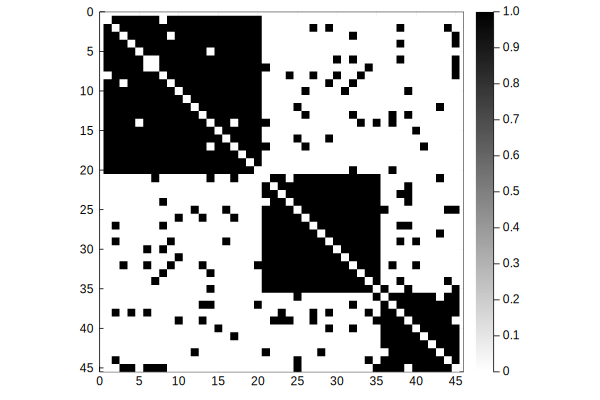

In [115]:
#now to produce the adjacency matrix, how to produce the block diagonal?..
#how about 8 nodes for the before and after like +/-4 and a random 0.5 for each other node
function vizMatrixBlock(Adj,NN)
    
    hAdjNN1 = heatmap(Adj,
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN+1.0),
        legend=true,ylims=(0.0,NN+0.5),
        yticks=0:5:NN,xticks=0:5:NN,
        fill=cgrad([:white,:black]))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function makeBlockDiagonalAdjacency()
    NN = length(classLabels)
    #make the adjacency for the ring network
    AdjNN = zeros(NN,NN)
    for ii in 1:size(AdjNN)[1]        
        for jj in 1:size(AdjNN)[2]   
            if(ii != jj)
                if(classLabels[ii] == classLabels[jj] && rand() < 0.8)                                            
                        AdjNN[ii,jj] = 1                
                        AdjNN[jj,ii] = 1                        
                elseif(rand() < 0.05)
                    AdjNN[ii,jj] = 1                
                    AdjNN[jj,ii] = 1                        
                end
            end
        end
    end    
    return AdjNN
end

adjMatrixBlock = makeBlockDiagonalAdjacency()
hVarX = vizMatrixBlock(adjMatrixBlock,length(classLabels))
p1=plot(hVarX,layout=1)
display(p1)
savefig(p1,"./figures/blockDiagonalmatrix.png")


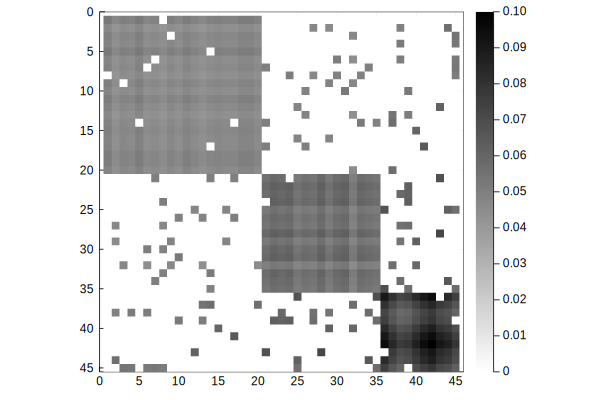

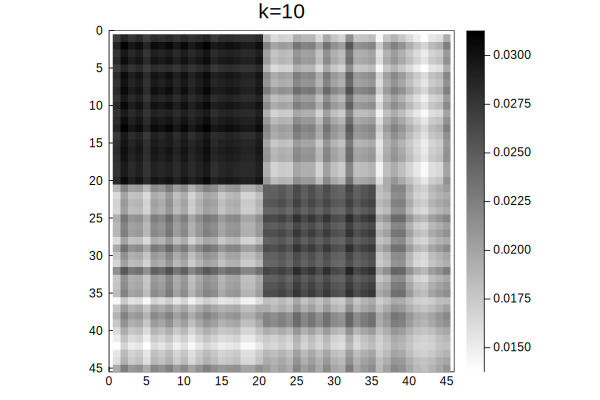

45×3 Array{Float64,2}:
  2.76351     1.77123     -1.87051 
  2.74272     1.91848     -1.70211 
  2.40991     1.67437     -1.55863 
  2.53698     1.6861      -1.51505 
  2.74774     1.71071     -1.81    
  2.42708     1.87387     -1.61156 
  2.54242     1.779       -1.71137 
  2.60443     1.98665     -1.77453 
  2.66583     1.77473     -1.82147 
  2.62758     1.84313     -1.72784 
  2.80115     1.74271     -1.83948 
  2.61779     1.7655      -1.62546 
  2.35108     1.62268     -1.35366 
  ⋮                                
  1.26534     2.33765     -1.42318 
  0.841274    1.99296     -0.847135
 -0.849049   -0.249664     2.31714 
 -0.51949    -0.203411     2.20339 
 -0.0113945   0.457328     1.48227 
 -0.0480952   0.52834      1.45414 
 -0.820353   -0.196318     2.39433 
 -0.918744   -0.500614     2.62833 
 -1.25207    -0.746107     3.04509 
 -0.475336    0.00129002   1.8404  
 -0.791756   -0.149835     2.23695 
  0.049027    0.25196      1.60836 

In [116]:
#draw the S mat as the normalized version
adjMatrixBlockSMAT = adjacency2Smatrix(deepcopy(adjMatrixBlock))
hVarX = vizMatrixBlock(adjMatrixBlockSMAT,length(classLabels))
p1=plot(hVarX,layout=1)
display(p1)
savefig(p1,"./figures/blockDiagonalmatrixSMAT.png")

hVarX = vizMatrixBlock(adjMatrixBlockSMAT^10,length(classLabels))
p1=plot(hVarX,layout=1)
title!("k=10")
display(p1)
savefig(p1,"./figures/blockDiagonalmatrixSMATk10.png")


projectionMat = adjMatrixBlockSMAT * Xvars * thetaMat

In [117]:
softmax(projectionMat[2,:])

3-element Array{Float64,1}:
 0.689509862682001   
 0.30239591895327783 
 0.008094218364721274

In [118]:

categoriesOverK = zeros(size(projectionMat)[1],K_MAX)

for k in 1:K_MAX
    projectionMat = adjMatrixBlockSMAT^k * Xvars * thetaMat
    categoryProbs = zeros(size(projectionMat))
    for row in 1:size(categoryProbs)[1]
        categoryProbs[row,:] = softmax(projectionMat[row,:])
    end
    cartInds = findmax(categoryProbs,dims=2)[2]
    categories = map(x -> x[2],cartInds)
    categoriesOverK[:,k] = categories[:]
end

categoriesOverK

45×25 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 

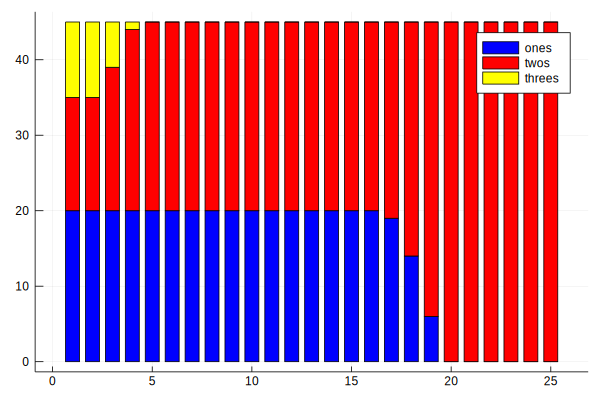

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 14, 6, 0, 0, 0, 0, 0, 0]
[15, 15, 19, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 31, 39, 45, 45, 45, 45, 45, 45]
[10, 10, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [119]:
onesA = [length(findall(categoriesOverK[:,i] .== 1)) for i in 1:size(categoriesOverK)[2]]
twosA = [length(findall(categoriesOverK[:,i] .== 2)) for i in 1:size(categoriesOverK)[2]]
threesA = [length(findall(categoriesOverK[:,i] .== 3)) for i in 1:size(categoriesOverK)[2]]
println(onesA)
println(twosA)
println(threesA)
#now show the distribution between polar sides as total sum above or below
g1 = groupedbar(hcat(onesA,twosA,threesA),label=["ones" "twos" "threes"],c=[:blue :red :yellow],
        bar_position = :stack, bar_width=0.7)
display(g1)
savefig(g1,"./figures/groupProgressions3categories.png") 

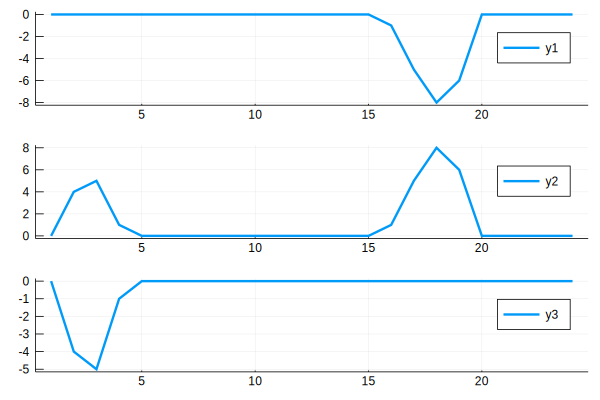

In [120]:

onesDiff = (diff(onesA))
twosDiff = (diff(twosA))
threesDiff = (diff(threesA))
p1 = plot([onesDiff twosDiff threesDiff], layout=(3,1),linewidth=3)
display(p1)
savefig(p1,"./figures/diffsProgressions.png") 

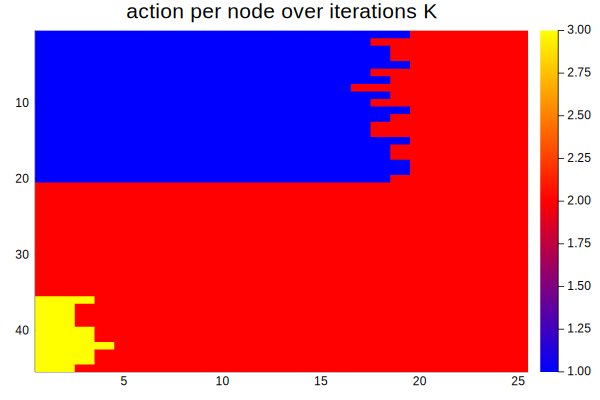

In [121]:

h1 = heatmap(categoriesOverK,fill=cgrad([:blue,:red, :yellow]),clims=(1,2,3),yaxis=:flip)
title!("action per node over iterations K")
display(h1)
savefig(h1,"./figures/heatmapProgression3categories.png") 

In [122]:
ZacharyAdj=[1 2
1 3
2 3
1 4
2 4
3 4
1 5
1 6
1 7
5 7
6 7
1 8
2 8
3 8
4 8
1 9
3 9
3 10
1 11
5 11
6 11
1 12
1 13
4 13
1 14
2 14
3 14
4 14
6 17
7 17
1 18
2 18
1 20
2 20
1 22
2 22
24 26
25 26
3 28
24 28
25 28
3 29
24 30
27 30
2 31
9 31
1 32
25 32
26 32
29 32
3 33
9 33
15 33
16 33
19 33
21 33
23 33
24 33
30 33
31 33
32 33
9 34
10 34
14 34
15 34
16 34
19 34
20 34
21 34
23 34
24 34
27 34
28 34
29 34
30 34
31 34
32 34
33 34]
println(size(ZacharyAdj))
maxNode = maximum(ZacharyAdj)
gZach = SimpleGraph(maxNode)
for row in 1:size(ZacharyAdj)[1]
    add_edge!(gZach, ZacharyAdj[row,1], ZacharyAdj[row,2])
end
println(gZach)
println(size(gZach))
adjacency_matrix(gZach) * (rand(34,1))

(78, 2)
{34, 78} undirected simple Int64 graph
(34, 34)


34×1 Array{Float64,2}:
 7.425911880242469  
 3.74647251002433   
 4.000354578985437  
 3.743793994194072  
 1.4814384971699723 
 2.467872164923923  
 2.6703895738204113 
 1.524627136698638  
 1.470387193540851  
 0.4201561167221626 
 1.6839559060664608 
 0.6066144005503067 
 0.6384624351578858 
 ⋮                  
 0.29202470559950333
 1.6737557164853618 
 1.052990239553381  
 1.5497991837518128 
 1.1182266162113332 
 1.3440945171038883 
 1.0460169000922497 
 1.3431535818259468 
 1.3166897915357314 
 1.587585126902896  
 5.958127967284285  
 7.752890526954339  

In [123]:
adjMatZach = Matrix(adjacency_matrix(gZach))

34×34 Array{Int64,2}:
 0  1  1  1  1  1  1  1  1  0  1  1  1  …  0  0  0  0  0  0  0  0  0  1  0  0
 1  0  1  1  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  1  0  0  0
 1  1  0  1  0  0  0  1  1  1  0  0  0     0  0  0  0  0  1  1  0  0  0  1  0
 1  1  1  0  0  0  0  1  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  1  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  1  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  1  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  1  0  1  1
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  1
 1  0  0  0  1  1  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  1  0  0  0  0  0  0  0  0  0    

In [124]:
(adjMatZach) * (rand(34,1))

34×1 Array{Float64,2}:
 7.31118739934661   
 4.13049282080211   
 6.321926912289225  
 2.896599413074048  
 0.36637111931621646
 0.9755696069511501 
 1.3522550774204776 
 2.276873624106048  
 2.8063063571794666 
 1.1478146975838088 
 0.7430565897855439 
 0.19693350221359585
 1.0617272871035766 
 ⋮                  
 1.491515686381734  
 3.5312330518088197 
 2.257621006252572  
 0.6483586125855281 
 1.1857079395031345 
 1.2070299014617938 
 1.736958106291352  
 1.7097091869455634 
 3.182321746453039  
 3.027404735431319  
 6.600700238559306  
 9.70887644608408   

34
34

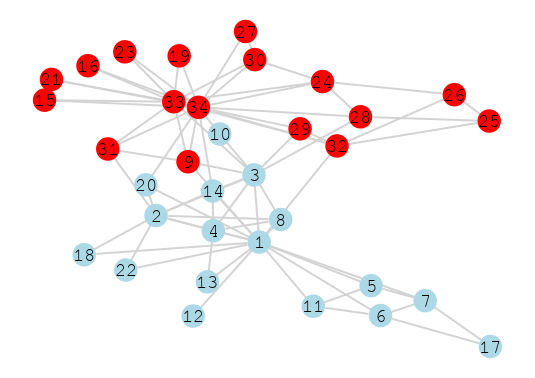

In [125]:
#g = smallgraph(:karate)
#gplot(g)
#gplot(gZach)
nodelabel = collect(1:nv(gZach))
#gplot(gZach, nodelabel=nodelabel)
nodesize = [1 for v in LightGraphs.vertices(gZach)]
membership = [1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2]
println(length(membership))
nodecolor = [colorant"lightblue", colorant"red"]
# membership color
nodefillc = nodecolor[membership]

print(length(nodesize))# nodelabeldist=0.0, nodelabelangleoffset=π/2,
gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc)

In [126]:
draw(PDF("./figures/zachgraph.pdf"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))
# save to png
draw(PNG("./figures/zachgraph.png"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))

In [127]:
theta1 = [1,0,0]
theta2 = [0,1,0]
theta3 = [0,0,1]
thetaMatZach = hcat(theta1,theta2,theta3)


3×3 Array{Int64,2}:
 1  0  0
 0  1  0
 0  0  1

In [128]:
XvarsZach = zeros(nv(gZach),length(theta1))
for row in 1:size(XvarsZach)[1]
    class = membership[row]
    if(class == 1)
        XvarsZach[row,:] = [10*rand(),4*rand(),rand()]
    else
        XvarsZach[row,:] = [4*rand(),10*rand(),rand()]
    end
    
end


In [129]:
adjacency2Smatrix(deepcopy(adjMatZach))^1 * XvarsZach * thetaMatZach

34×3 Array{Float64,2}:
 10.0674    5.30783  0.696595 
  5.91548   2.85927  0.470544 
  4.36796   4.10763  0.709402 
  4.74773   1.878    0.482113 
  4.628     1.60363  0.21632  
  5.59497   1.91684  0.407488 
  4.94207   2.63439  0.398777 
  2.37586   1.36755  0.2644   
  2.41189   3.84109  0.315389 
  3.03915   2.46715  0.477332 
  3.97528   1.39844  0.183603 
  3.80353   1.84838  0.0739527
  3.80019   1.84885  0.206182 
  ⋮                           
  1.67441   4.35459  0.346231 
  2.05336   4.34509  0.572843 
  2.08729   4.35976  0.314193 
  1.44297   4.34951  0.449358 
  0.904452  1.36421  0.401633 
  2.21408   2.83652  0.382436 
  1.84285   3.22402  0.324329 
  1.0896    2.83173  0.508196 
  2.27076   4.04793  0.350456 
  1.77286   4.34322  0.400978 
  4.01015   9.19692  0.772453 
  4.95796   9.44805  1.05513  

In [130]:
adjMatZachSMAT = adjacency2Smatrix(deepcopy(adjMatZach))
K_MAX_NEW = K_MAX * 2
categoriesOverK = zeros(size(adjMatZachSMAT)[1],K_MAX_NEW)

for k in 1:K_MAX_NEW
    projectionMat = adjMatZachSMAT^k * XvarsZach * thetaMatZach
    categoryProbs = zeros(size(projectionMat))
    for row in 1:size(categoryProbs)[1]
        categoryProbs[row,:] = softmax(projectionMat[row,:])
    end
    cartInds = findmax(categoryProbs,dims=2)[2]
    categories = map(x -> x[2],cartInds)
    categoriesOverK[:,k] = categories[:]
end

categoriesOverK


34×50 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 

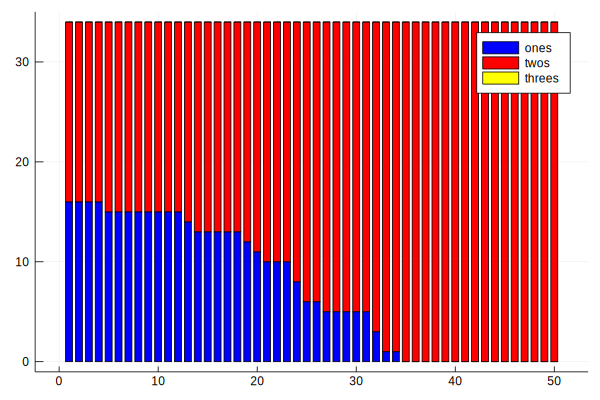

In [131]:
onesA = [length(findall(categoriesOverK[:,i] .== 1)) for i in 1:size(categoriesOverK)[2]]
twosA = [length(findall(categoriesOverK[:,i] .== 2)) for i in 1:size(categoriesOverK)[2]]
threesA = [length(findall(categoriesOverK[:,i] .== 3)) for i in 1:size(categoriesOverK)[2]]

#now show the distribution between polar sides as total sum above or below
g1 = groupedbar(hcat(onesA,twosA,threesA),label=["ones" "twos" "threes"],c=[:blue :red :yellow],
        bar_position = :stack, bar_width=0.7)
display(g1)
savefig(g1,"./figures/groupProgressions3categoriesZach.png") 

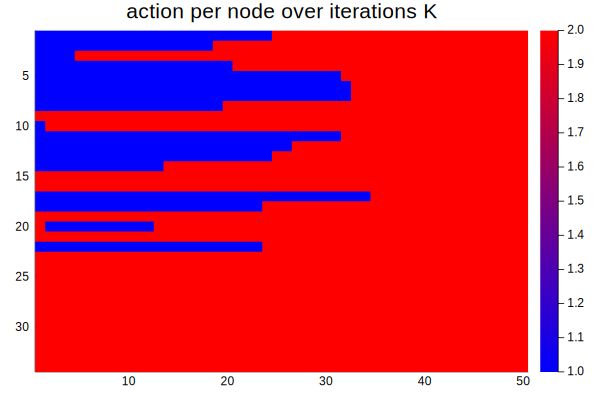

In [132]:

h1 = heatmap(categoriesOverK,fill=cgrad([:blue,:red]),clims=(1,2),yaxis=:flip)
title!("action per node over iterations K")
display(h1)
savefig(h1,"./figures/heatmapProgression3categoriesZach.png") 

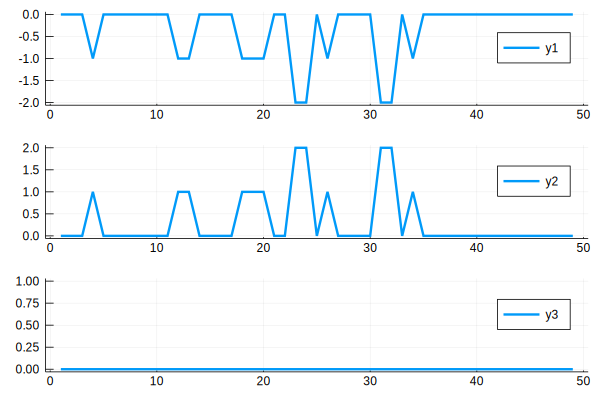

In [133]:

onesDiff = (diff(onesA))
twosDiff = (diff(twosA))
threesDiff = (diff(threesA))
p1 = plot([onesDiff twosDiff threesDiff], layout=(3,1),linewidth=3)
display(p1)
savefig(p1,"./figures/diffsProgressionsZach.png") 

34

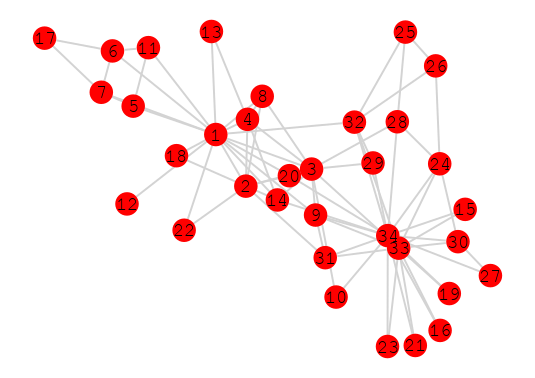

In [134]:
nodecolor = [colorant"lightblue", colorant"red", colorant"yellow"]
# membership color
nodefillc = nodecolor[Int.(categoriesOverK[:,end-10])]

print(length(nodesize))# nodelabeldist=0.0, nodelabelangleoffset=π/2,
gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc)

In [135]:
draw(PDF("./figures/zachgraph2.pdf"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))
# save to png
draw(PNG("./figures/zachgraph2.png"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))

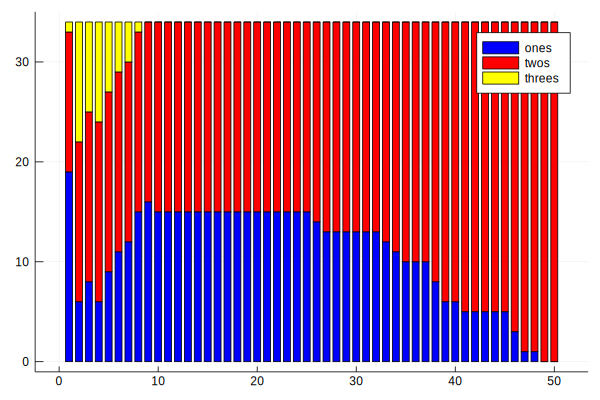

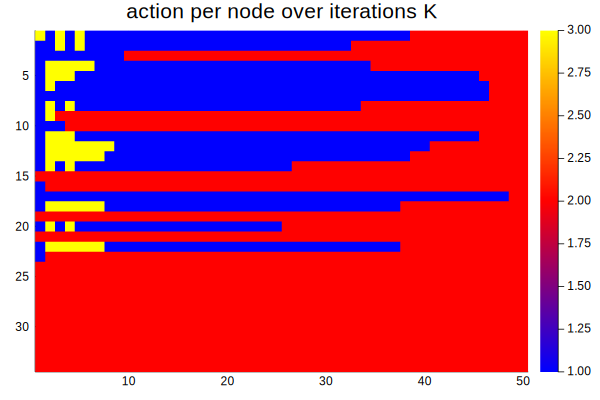

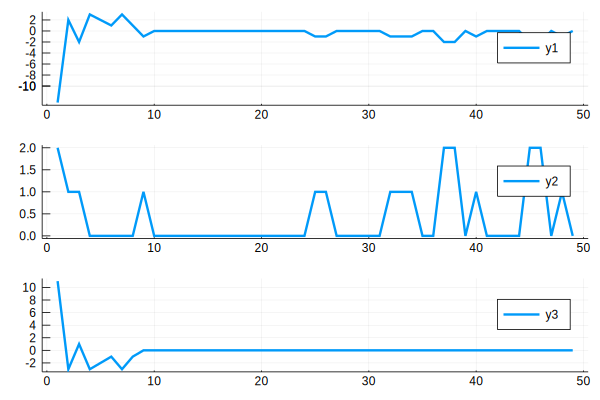

[3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


In [136]:
XvarsZach = zeros(nv(gZach),length(theta1))
for row in 1:size(XvarsZach)[1]
    class = membership[row]
    if(row == 1)
        XvarsZach[row,:] = [1*rand(),1*rand(),30+60*rand()]
        continue
    end
    if(class == 1)
        XvarsZach[row,:] = [10*rand()+1,4*rand()+1,rand()]
    else
        XvarsZach[row,:] = [4*rand()+1,10*rand()+1,rand()]
    end
    
end
XvarsZach

adjMatZachSMAT = adjacency2Smatrix(deepcopy(adjMatZach))
K_MAX_NEW = K_MAX * 2
categoriesOverK = zeros(size(adjMatZachSMAT)[1],K_MAX_NEW)

for k in 1:K_MAX_NEW
    projectionMat = adjMatZachSMAT^(k-1) * XvarsZach * thetaMatZach
    categoryProbs = zeros(size(projectionMat))
    for row in 1:size(categoryProbs)[1]
        categoryProbs[row,:] = softmax(projectionMat[row,:])
    end
    cartInds = findmax(categoryProbs,dims=2)[2]
    categories = map(x -> x[2],cartInds)
    categoriesOverK[:,k] = categories[:]
end

categoriesOverK
println(categoriesOverK[:,1])
onesA = [length(findall(categoriesOverK[:,i] .== 1)) for i in 1:size(categoriesOverK)[2]]
twosA = [length(findall(categoriesOverK[:,i] .== 2)) for i in 1:size(categoriesOverK)[2]]
threesA = [length(findall(categoriesOverK[:,i] .== 3)) for i in 1:size(categoriesOverK)[2]]

#now show the distribution between polar sides as total sum above or below
g1 = groupedbar(hcat(onesA,twosA,threesA),label=["ones" "twos" "threes"],c=[:blue :red :yellow],
        bar_position = :stack, bar_width=0.7)
display(g1)
savefig(g1,"./figures/groupProgressions3categoriesZach2.png") 

h1 = heatmap(categoriesOverK,fill=cgrad([:blue,:red,:yellow]),clims=(1,2,3),yaxis=:flip)
title!("action per node over iterations K")
display(h1)
savefig(h1,"./figures/heatmapProgression3categoriesZach2.png")

onesDiff = (diff(onesA))
twosDiff = (diff(twosA))
threesDiff = (diff(threesA))
p1 = plot([onesDiff twosDiff threesDiff], layout=(3,1),linewidth=3)
display(p1)
savefig(p1,"./figures/diffsProgressionsZach2.png") 

34

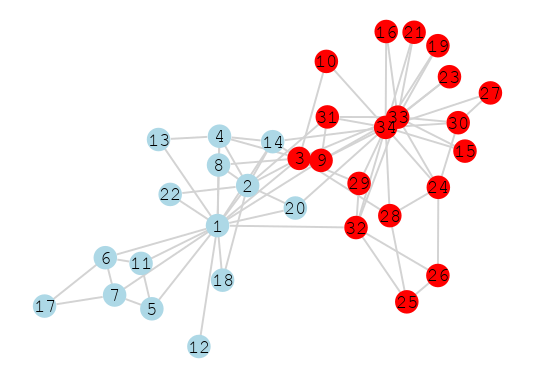

In [137]:
nodecolor = [colorant"lightblue", colorant"red", colorant"yellow"]
# membership color
nodefillc = nodecolor[Int.(categoriesOverK[:,10])]

print(length(nodesize))# nodelabeldist=0.0, nodelabelangleoffset=π/2,
gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc)

In [138]:
draw(PDF("./figures/zachgraph3.pdf"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))
# save to png
draw(PNG("./figures/zachgraph3.png"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))

In [139]:
categoriesOverK[:,1]

34-element Array{Float64,1}:
 3.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0
 2.0

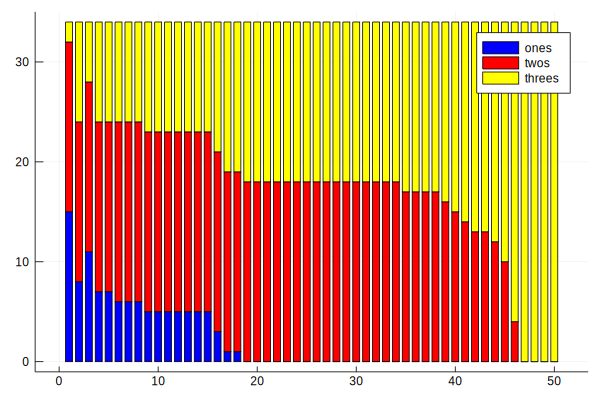

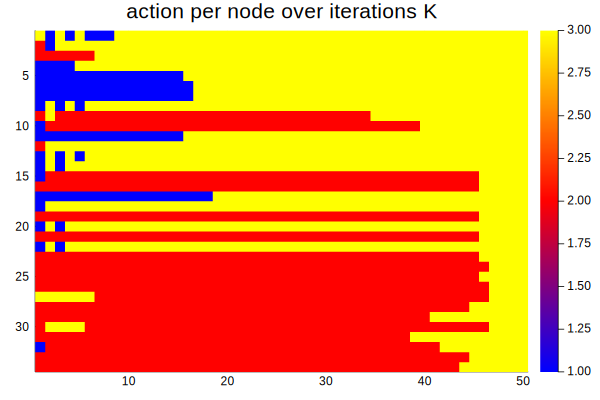

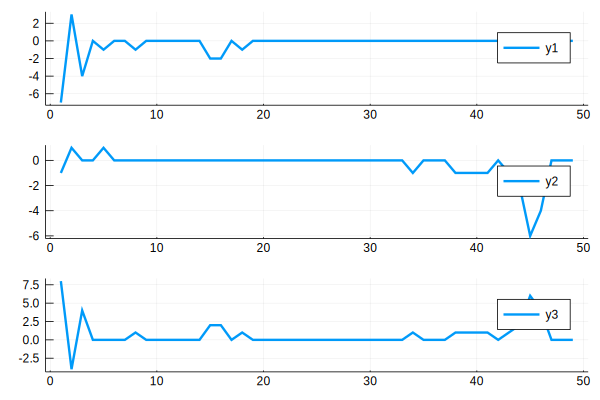

[3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0]
34

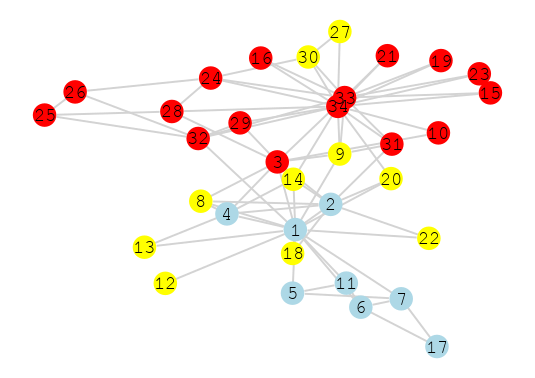

In [140]:
XvarsZach = zeros(nv(gZach),length(theta1))
for row in 1:size(XvarsZach)[1]
    class = membership[row]
    if(row == 1 || row == 27)
        XvarsZach[row,:] = [1*rand(),1*rand(),30+60*rand()]
        continue
    end
    if(class == 1)
        XvarsZach[row,:] = [10*rand()+1,4*rand()+1,rand()]
    else
        XvarsZach[row,:] = [4*rand()+1,10*rand()+1,rand()]
    end
    
end
XvarsZach

adjMatZachSMAT = adjacency2Smatrix(deepcopy(adjMatZach))
K_MAX_NEW = K_MAX * 2
categoriesOverK = zeros(size(adjMatZachSMAT)[1],K_MAX_NEW)

for k in 1:K_MAX_NEW
    projectionMat = adjMatZachSMAT^(k-1) * XvarsZach * thetaMatZach
    categoryProbs = zeros(size(projectionMat))
    for row in 1:size(categoryProbs)[1]
        categoryProbs[row,:] = softmax(projectionMat[row,:])
    end
    cartInds = findmax(categoryProbs,dims=2)[2]
    categories = map(x -> x[2],cartInds)
    categoriesOverK[:,k] = categories[:]
end

categoriesOverK
println(categoriesOverK[:,1])
onesA = [length(findall(categoriesOverK[:,i] .== 1)) for i in 1:size(categoriesOverK)[2]]
twosA = [length(findall(categoriesOverK[:,i] .== 2)) for i in 1:size(categoriesOverK)[2]]
threesA = [length(findall(categoriesOverK[:,i] .== 3)) for i in 1:size(categoriesOverK)[2]]

#now show the distribution between polar sides as total sum above or below
g1 = groupedbar(hcat(onesA,twosA,threesA),label=["ones" "twos" "threes"],c=[:blue :red :yellow],
        bar_position = :stack, bar_width=0.7)
display(g1)
savefig(g1,"./figures/groupProgressions3categoriesZach3.png") 

h1 = heatmap(categoriesOverK,fill=cgrad([:blue,:red,:yellow]),clims=(1,2,3),yaxis=:flip)
title!("action per node over iterations K")
display(h1)
savefig(h1,"./figures/heatmapProgression3categoriesZach3.png")

onesDiff = (diff(onesA))
twosDiff = (diff(twosA))
threesDiff = (diff(threesA))
p1 = plot([onesDiff twosDiff threesDiff], layout=(3,1),linewidth=3)
display(p1)
savefig(p1,"./figures/diffsProgressionsZach3.png") 

nodecolor = [colorant"lightblue", colorant"red", colorant"yellow"]
# membership color
nodefillc = nodecolor[Int.(categoriesOverK[:,2])]

print(length(nodesize))# nodelabeldist=0.0, nodelabelangleoffset=π/2,
gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc)
#draw(PDF("zach3graph.pdf"), gplot(gZach))
# save to png
#draw(PNG("zach3graph.png"), gplot(gZach))

In [141]:
draw(PDF("./figures/zachgraph4.pdf"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))
# save to png
draw(PNG("./figures/zachgraph4.png"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))

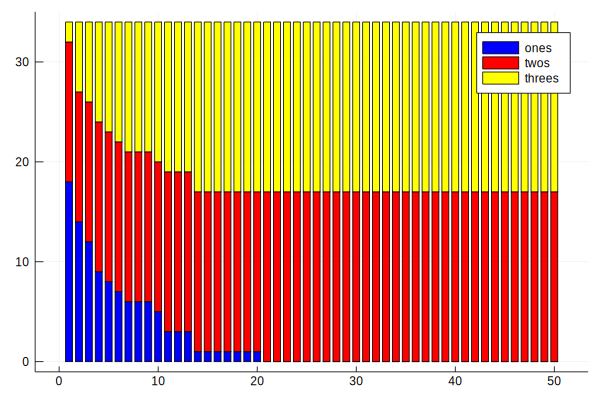

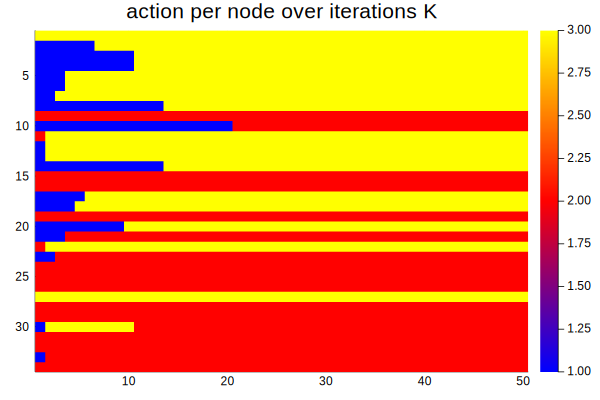

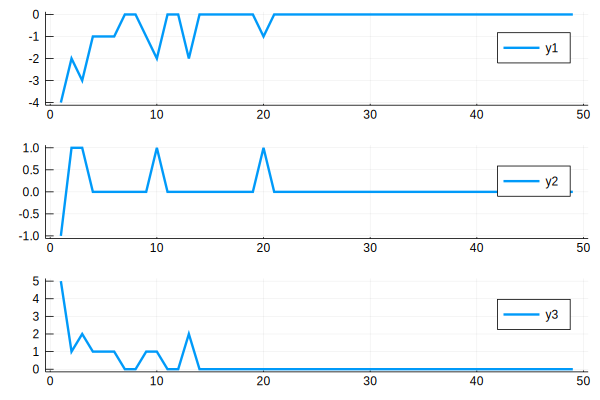

[3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0]
34

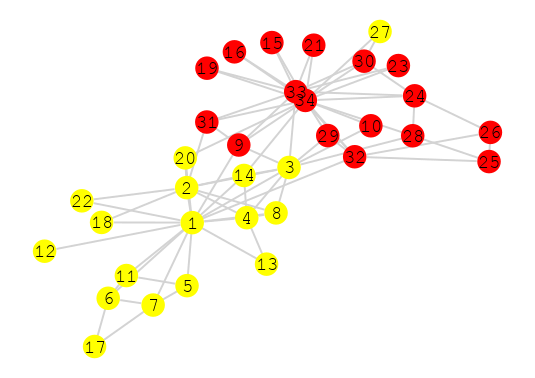

In [142]:
#now for the accumulated layer polynomial
XvarsZach = zeros(nv(gZach),length(theta1))
for row in 1:size(XvarsZach)[1]
    class = membership[row]
    if(row == 1 || row == 27)
        XvarsZach[row,:] = [1*rand(),1*rand(),30+60*rand()]
        continue
    end
    if(class == 1)
        XvarsZach[row,:] = [10*rand()+1,4*rand()+1,rand()]
    else
        XvarsZach[row,:] = [4*rand()+1,10*rand()+1,rand()]
    end
    
end
XvarsZach

adjMatZachSMAT = adjacency2Smatrix(deepcopy(adjMatZach))
K_MAX_NEW = K_MAX * 2
categoriesOverK = zeros(size(adjMatZachSMAT)[1],K_MAX_NEW)

for k in 1:K_MAX_NEW
    if(k > 1)
        projectionMat = projectionMat + adjMatZachSMAT^(k-1) * XvarsZach * thetaMatZach
    else
        projectionMat = adjMatZachSMAT^(k-1) * XvarsZach * thetaMatZach
    end
    categoryProbs = zeros(size(projectionMat))
    for row in 1:size(categoryProbs)[1]
        categoryProbs[row,:] = softmax(projectionMat[row,:])
    end
    cartInds = findmax(categoryProbs,dims=2)[2]
    categories = map(x -> x[2],cartInds)
    categoriesOverK[:,k] = categories[:]
end

categoriesOverK
println(categoriesOverK[:,1])
onesA = [length(findall(categoriesOverK[:,i] .== 1)) for i in 1:size(categoriesOverK)[2]]
twosA = [length(findall(categoriesOverK[:,i] .== 2)) for i in 1:size(categoriesOverK)[2]]
threesA = [length(findall(categoriesOverK[:,i] .== 3)) for i in 1:size(categoriesOverK)[2]]

#now show the distribution between polar sides as total sum above or below
g1 = groupedbar(hcat(onesA,twosA,threesA),label=["ones" "twos" "threes"],c=[:blue :red :yellow],
        bar_position = :stack, bar_width=0.7)
display(g1)
savefig(g1,"./figures/groupProgressions3categoriesZachPOLYNOMIAL1.png") 

h1 = heatmap(categoriesOverK,fill=cgrad([:blue,:red,:yellow]),clims=(1,2,3),yaxis=:flip)
title!("action per node over iterations K")
display(h1)
savefig(h1,"./figures/heatmapProgression3categoriesPOLYNOMIAL1.png")

onesDiff = (diff(onesA))
twosDiff = (diff(twosA))
threesDiff = (diff(threesA))
p1 = plot([onesDiff twosDiff threesDiff], layout=(3,1),linewidth=3)
display(p1)
savefig(p1,"./figures/diffsProgressionsZachPOLYNOMIAL1.png") 

nodecolor = [colorant"lightblue", colorant"red", colorant"yellow"]
# membership color
nodefillc = nodecolor[Int.(categoriesOverK[:,end])]

print(length(nodesize))# nodelabeldist=0.0, nodelabelangleoffset=π/2,
gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc)
#draw(PDF("zach3graph.pdf"), gplot(gZach))
# save to png
#draw(PNG("zach3graph.png"), gplot(gZach))

In [143]:
draw(PDF("./figures/zachgraphPOLYNOMIAL1.pdf"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))
# save to png
draw(PNG("./figures/zachgraphPOLYNOMIAL1.png"), 
    gplot(gZach, nodelabel=nodelabel, NODESIZE=0.055, NODELABELSIZE = 5, nodefillc=nodefillc))